In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import re
import os
import dataframe_image as dfi

In [2]:
file_dir='C://Users/Ian/Desktop/Misc_Projects/World_Cup_Analysis/Data'

matches = pd.read_csv(f'{file_dir}/import_matches_transformed.csv')
players = pd.read_csv(f'{file_dir}/WorldCupPlayers.csv')


pd.options.display.float_format = '{:.2f}'.format

In [3]:
matches.head(50)

,match_date,year,country,city,stadium,attendance,stage,home_name,home_init,away_name,away_init,home_score_45,away_score_45,home_score_final,away_score_final,winner,matchID,roundID
0,1930-07-13,1930,Uruguay,Montevideo,Pocitos,4444.00,Group 1,France,FRA,Mexico,MEX,3,0,4,1,France,1096,201
1,1930-07-13,1930,Uruguay,Montevideo,Parque Central,18346.00,Group 4,United States,USA,Belgium,BEL,2,0,3,0,United States,1090,201
2,1930-07-14,1930,Uruguay,Montevideo,Parque Central,24059.00,Group 2,Yugoslavia,YUG,Brazil,BRA,2,0,2,1,FR Yugoslavia,1093,201
3,1930-07-14,1930,Uruguay,Montevideo,Pocitos,2549.00,Group 3,Romania,ROU,Peru,PER,1,0,3,1,Romania,1098,201
4,1930-07-15,1930,Uruguay,Montevideo,Parque Central,23409.00,Group 1,Argentina,ARG,France,FRA,0,0,1,0,Argentina,1085,201
5,1930-07-16,1930,Uruguay,Montevideo,Parque Central,9249.00,Group 1,Chile,CHI,Mexico,MEX,1,0,3,0,Chile,1095,201
6,1930-07-17,1930,Uruguay,Montevideo,Parque Central,18306.00,Group 2,Yugoslavia,YUG,Bolivia,BOL,0,0,4,0,FR Yugoslavia,1092,201
7,1930-07-17,1930,Uruguay,Montevideo,Parque Central,18306.00,Group 4,United States,USA,Paraguay,PAR,2,0,3,0,United States,1097,201
8,1930-07-18,1930,Uruguay,Montevideo,Estadio Centenario,57735.00,Group 3,Uruguay,URU,Peru,PER,0,0,1,0,Uruguay,1099,201
9,1930-07-19,1930,Uruguay,Montevideo,Estadio Centenario,2000.00,Group 1,Chile,CHI,France,FRA,0,0,1,0,Chile,1094,201


# MORE TRANSFORMATIONS

### Add columns for goals in 1st/2nd half

In [4]:
# Change appropriate columns to 'home_score_half1'
matches = matches.rename(columns={'home_score_45':'home_score_half1','away_score_45':'away_score_half1'})

In [5]:
# Add a 'home_score_half2' column
matches['home_score_half2'] = matches['home_score_final'] - matches['home_score_half1']
matches['away_score_half2'] = matches['away_score_final'] - matches['away_score_half1']

In [6]:
cols = ['matchID', 'roundID', 'match_date', 'year', 'country', 'city', 'stadium', 'attendance',
       'stage', 'home_name', 'home_init', 'away_name', 'away_init',
       'home_score_half1', 'away_score_half1', 'home_score_half2', 'away_score_half2',
        'home_score_final', 'away_score_final', 'winner']

matches = matches[cols]

In [7]:
matches

,matchID,roundID,match_date,year,country,city,stadium,attendance,stage,home_name,home_init,away_name,away_init,home_score_half1,away_score_half1,home_score_half2,away_score_half2,home_score_final,away_score_final,winner
0,1096,201,1930-07-13,1930,Uruguay,Montevideo,Pocitos,4444.00,Group 1,France,FRA,Mexico,MEX,3,0,1,1,4,1,France
1,1090,201,1930-07-13,1930,Uruguay,Montevideo,Parque Central,18346.00,Group 4,United States,USA,Belgium,BEL,2,0,1,0,3,0,United States
2,1093,201,1930-07-14,1930,Uruguay,Montevideo,Parque Central,24059.00,Group 2,Yugoslavia,YUG,Brazil,BRA,2,0,0,1,2,1,FR Yugoslavia
3,1098,201,1930-07-14,1930,Uruguay,Montevideo,Pocitos,2549.00,Group 3,Romania,ROU,Peru,PER,1,0,2,1,3,1,Romania
4,1085,201,1930-07-15,1930,Uruguay,Montevideo,Parque Central,23409.00,Group 1,Argentina,ARG,France,FRA,0,0,1,0,1,0,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,300186488,255953,2014-07-05,2014,Brazil,Salvador,Arena Fonte Nova,51179.00,Quarterfinals,Netherlands,NED,Costa Rica,CRC,0,0,0,0,0,0,Draw: Netherlands
848,300186474,255955,2014-07-08,2014,Brazil,Belo Horizonte,Estadio Mineirao,58141.00,Semifinals,Brazil,BRA,Germany,GER,0,5,1,2,1,7,Germany
849,300186490,255955,2014-07-09,2014,Brazil,São Paulo,Arena de Sao Paulo,63267.00,Semifinals,Netherlands,NED,Argentina,ARG,0,0,0,0,0,0,Draw: Netherlands
850,300186502,255957,2014-07-12,2014,Brazil,Brasília,Estadio Nacional,68034.00,Third place,Brazil,BRA,Netherlands,NED,0,2,0,1,0,3,Netherlands


In [8]:
# Add columns for 'winning score' and 'losing score'
def winner_halftime_score(row):
    if row['winner'] == row['home_name']:
        return row['home_score_half1']
    if row['winner'] == row['away_name']:
        return row['away_score_half1']
    
def winner_half2_score(row):
    if row['winner'] == row['home_name']:
        return row['home_score_final']-row['home_score_half1']
    if row['winner'] == row['away_name']:
        return row['away_score_final']-row['away_score_half1']
    
def winner_final_score(row):
    if row['winner'] == row['home_name']:
        return row['home_score_final']
    if row['winner'] == row['away_name']:
        return row['away_score_final']
    
def loser_halftime_score(row):
    if row['winner'] == row['home_name']:
        return row['away_score_half1']
    if row['winner'] == row['away_name']:
        return row['home_score_half1']
    
def loser_half2_score(row):
    if row['winner'] == row['home_name']:
        return row['away_score_final']-row['away_score_half1']
    if row['winner'] == row['away_name']:
        return row['home_score_final']-row['home_score_half1']
    
def loser_final_score(row):
    if row['winner'] == row['home_name']:
        return row['away_score_final']
    if row['winner'] == row['away_name']:
        return row['home_score_final']

In [9]:
matches['winning_score_half1'] = matches.apply(lambda row: winner_halftime_score(row), axis=1)
matches['losing_score_half1'] = matches.apply(lambda row: loser_halftime_score(row), axis=1)

matches['winning_score_half2'] = matches.apply(lambda row: winner_half2_score(row), axis=1)
matches['losing_score_half2'] = matches.apply(lambda row: loser_half2_score(row), axis=1)

matches['winning_score_final'] = matches.apply(lambda row: winner_final_score(row), axis=1)
matches['losing_score_final'] = matches.apply(lambda row: loser_final_score(row), axis=1)

### Fix Yugoslavia name inconsitincies

In [10]:
# Double check if there are any rows with null winning/losing scores where it was NOT a draw
matches.loc[(matches['winning_score_half1'].isnull()==True)&(matches['home_score_final']!=matches['away_score_final'])]

,matchID,roundID,match_date,year,country,city,stadium,attendance,stage,home_name,...,away_score_half2,home_score_final,away_score_final,winner,winning_score_half1,losing_score_half1,winning_score_half2,losing_score_half2,winning_score_final,losing_score_final
2,1093,201,1930-07-14,1930,Uruguay,Montevideo,Parque Central,24059.00,Group 2,Yugoslavia,...,1,2,1,FR Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN
6,1092,201,1930-07-17,1930,Uruguay,Montevideo,Parque Central,18306.00,Group 2,Yugoslavia,...,0,4,0,FR Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN
57,1230,208,1950-06-25,1950,Brazil,Belo Horizonte,Independencia,7336.00,Group 1,Yugoslavia,...,0,3,0,FR Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN
59,1225,208,1950-06-28,1950,Brazil,Porto Alegre,Eucaliptos,11078.00,Group 1,Yugoslavia,...,1,4,1,FR Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN
78,1276,211,1954-06-16,1954,Switzerland,Lausanne,La Pontaise,16000.00,Group 1,Yugoslavia,...,0,1,0,FR Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN
112,1388,220,1958-06-11,1958,Sweden,Västerås,Arosvallen,12217.00,Group 2,Yugoslavia,...,1,3,2,FR Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN
144,1564,231,1962-06-02,1962,Chile,Arica,Carlos Dittborn,8829.00,Group 1,Yugoslavia,...,0,3,1,FR Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN
156,1480,231,1962-06-07,1962,Chile,Arica,Carlos Dittborn,7167.00,Group 1,Yugoslavia,...,0,5,0,FR Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN
163,1511,232,1962-06-10,1962,Chile,Santiago,Nacional,63324.00,Quarterfinals,Yugoslavia,...,0,1,0,FR Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN
243,2186,262,1974-06-18,1974,Germany,Gelsenkirchen,Parkstadion,31700.00,Group 2,Yugoslavia,...,0,9,0,FR Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Functions to change 'FR Yugoslavia' into format that works with winning/losing score functions
def change_yugoslavia_away(row):
    if (row['away_name'] == 'FR Yugoslavia'):
        return 'Yugoslavia'
    else:
        return row['away_name']

def change_yugoslavia_winner(row):
    if (row['winner'] == 'FR Yugoslavia'):
        return 'Yugoslavia'
    else:
        return row['winner']

In [12]:
# Apply the new functions to change 'FR Yugoslavia' into format that works with the new column functions
matches['away_name'] = matches.apply(lambda row: change_yugoslavia_away(row), axis=1)
matches['winner'] = matches.apply(lambda row: change_yugoslavia_winner(row), axis=1)
matches['winning_score_half1'] = matches.apply(lambda row: winner_halftime_score(row), axis=1)
matches['losing_score_half1'] = matches.apply(lambda row: loser_halftime_score(row), axis=1)
matches['winning_score_final'] = matches.apply(lambda row: winner_final_score(row), axis=1)
matches['losing_score_final'] = matches.apply(lambda row: loser_final_score(row), axis=1)

In [13]:
# Verify no more weird cases
matches.loc[(matches['winning_score_half1'].isnull()==True)&(matches['home_score_final']!=matches['away_score_final'])]

,matchID,roundID,match_date,year,country,city,stadium,attendance,stage,home_name,...,away_score_half2,home_score_final,away_score_final,winner,winning_score_half1,losing_score_half1,winning_score_half2,losing_score_half2,winning_score_final,losing_score_final


In [14]:
# Verify those matches have results now for winning/losing scores
matches.loc[matches['winner']=='Yugoslavia']

,matchID,roundID,match_date,year,country,city,stadium,attendance,stage,home_name,...,away_score_half2,home_score_final,away_score_final,winner,winning_score_half1,losing_score_half1,winning_score_half2,losing_score_half2,winning_score_final,losing_score_final
2,1093,201,1930-07-14,1930,Uruguay,Montevideo,Parque Central,24059.00,Group 2,Yugoslavia,...,1,2,1,Yugoslavia,2.00,0.00,NaN,NaN,2.00,1.00
6,1092,201,1930-07-17,1930,Uruguay,Montevideo,Parque Central,18306.00,Group 2,Yugoslavia,...,0,4,0,Yugoslavia,0.00,0.00,NaN,NaN,4.00,0.00
57,1230,208,1950-06-25,1950,Brazil,Belo Horizonte,Independencia,7336.00,Group 1,Yugoslavia,...,0,3,0,Yugoslavia,0.00,0.00,NaN,NaN,3.00,0.00
59,1225,208,1950-06-28,1950,Brazil,Porto Alegre,Eucaliptos,11078.00,Group 1,Yugoslavia,...,1,4,1,Yugoslavia,2.00,0.00,NaN,NaN,4.00,1.00
78,1276,211,1954-06-16,1954,Switzerland,Lausanne,La Pontaise,16000.00,Group 1,Yugoslavia,...,0,1,0,Yugoslavia,1.00,0.00,NaN,NaN,1.00,0.00
112,1388,220,1958-06-11,1958,Sweden,Västerås,Arosvallen,12217.00,Group 2,Yugoslavia,...,1,3,2,Yugoslavia,1.00,1.00,NaN,NaN,3.00,2.00
144,1564,231,1962-06-02,1962,Chile,Arica,Carlos Dittborn,8829.00,Group 1,Yugoslavia,...,0,3,1,Yugoslavia,2.00,1.00,NaN,NaN,3.00,1.00
156,1480,231,1962-06-07,1962,Chile,Arica,Carlos Dittborn,7167.00,Group 1,Yugoslavia,...,0,5,0,Yugoslavia,2.00,0.00,NaN,NaN,5.00,0.00
163,1511,232,1962-06-10,1962,Chile,Santiago,Nacional,63324.00,Quarterfinals,Yugoslavia,...,0,1,0,Yugoslavia,0.00,0.00,NaN,NaN,1.00,0.00
243,2186,262,1974-06-18,1974,Germany,Gelsenkirchen,Parkstadion,31700.00,Group 2,Yugoslavia,...,0,9,0,Yugoslavia,6.00,0.00,NaN,NaN,9.00,0.00


### Fix group stage and consolidate final two matchs (1st/2nd and 3rd/4th) into "final round" in 'stage' column

#### Note that world cups in 1974, 1978, 1982 had a double-group stage format. We will consider the '2nd group stage' to be the 'Round of 16' for those years

#### Also note that world cups in 1930, 1934, 1938 had no group stages. We will transform their 'Round of 16' to 'Groups' to be more consistent with the idea of it being an "introductory" round that teams must advance past

In [15]:
# Change stage results where it says 'group' something to just 'group'
stages = matches['stage']

stages.unique()

array(['Group 1', 'Group 4', 'Group 2', 'Group 3', 'Semifinals', 'Final',
       'Round of 16', 'Quarterfinals', 'Third place', 'Final Round',
       'Group B', 'Group A', 'Group 6', 'Group 5', 'Group D', 'Group C',
       'Group F', 'Group E', ' Group A', 'Group H', 'Group G'],
      dtype=object)

In [16]:
second_groups = matches.loc[(matches['year']==1974)|(matches['year']==1978)|(matches['year']==1982)]
second_groups.loc[(second_groups['stage']=='Group A')|
                  (second_groups['stage']=='Group B')|
                  (second_groups['stage']=='Group C')|
                  (second_groups['stage']=='Group D')]

,matchID,roundID,match_date,year,country,city,stadium,attendance,stage,home_name,...,away_score_half2,home_score_final,away_score_final,winner,winning_score_half1,losing_score_half1,winning_score_half2,losing_score_half2,winning_score_final,losing_score_final
256,2066,263,1974-06-26,1974,Germany,Düsseldorf,Rheinstadion,67385.00,Group B,Yugoslavia,...,1,0,2,West Germany,1.00,0.00,1.00,0.00,2.00,0.00
257,1982,263,1974-06-26,1974,Germany,Hanover,Niedersachsenstadion,59863.00,Group A,Brazil,...,0,1,0,Brazil,0.00,0.00,1.00,0.00,1.00,0.00
258,1948,263,1974-06-26,1974,Germany,Gelsenkirchen,Parkstadion,56548.00,Group A,Netherlands,...,0,4,0,Netherlands,2.00,0.00,2.00,0.00,4.00,0.00
259,2167,263,1974-06-26,1974,Germany,Stuttgart,Neckarstadion,44955.00,Group B,Sweden,...,0,0,1,Poland,1.00,0.00,0.00,0.00,1.00,0.00
260,1945,263,1974-06-30,1974,Germany,Hanover,Niedersachsenstadion,39400.00,Group A,Argentina,...,1,1,2,Brazil,1.00,1.00,1.00,0.00,2.00,1.00
261,2170,263,1974-06-30,1974,Germany,Frankfurt am Main,Waldstadion,58000.00,Group B,Poland,...,0,2,1,Poland,1.00,1.00,1.00,0.00,2.00,1.00
262,2067,263,1974-06-30,1974,Germany,Gelsenkirchen,Parkstadion,68348.00,Group A,East Germany,...,1,0,2,Netherlands,1.00,0.00,1.00,0.00,2.00,0.00
263,2065,263,1974-06-30,1974,Germany,Düsseldorf,Rheinstadion,67800.00,Group B,West Germany,...,1,4,2,West Germany,0.00,1.00,4.00,1.00,4.00,2.00
264,2064,263,1974-07-03,1974,Germany,Frankfurt am Main,Waldstadion,62000.00,Group B,Poland,...,1,0,1,West Germany,0.00,0.00,1.00,0.00,1.00,0.00
265,1983,263,1974-07-03,1974,Germany,Dortmund,Westfalenstadion,53700.00,Group A,Netherlands,...,0,2,0,Netherlands,0.00,0.00,2.00,0.00,2.00,0.00


In [17]:
second_groups_stages = second_groups['stage']
second_groups_stages = second_groups_stages.replace(r'Group [ABCD]','Round of 16', regex=True)
second_groups['stage'] = second_groups_stages
second_groups.loc[second_groups['stage']=='Round of 16']

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,matchID,roundID,match_date,year,country,city,stadium,attendance,stage,home_name,...,away_score_half2,home_score_final,away_score_final,winner,winning_score_half1,losing_score_half1,winning_score_half2,losing_score_half2,winning_score_final,losing_score_final
256,2066,263,1974-06-26,1974,Germany,Düsseldorf,Rheinstadion,67385.00,Round of 16,Yugoslavia,...,1,0,2,West Germany,1.00,0.00,1.00,0.00,2.00,0.00
257,1982,263,1974-06-26,1974,Germany,Hanover,Niedersachsenstadion,59863.00,Round of 16,Brazil,...,0,1,0,Brazil,0.00,0.00,1.00,0.00,1.00,0.00
258,1948,263,1974-06-26,1974,Germany,Gelsenkirchen,Parkstadion,56548.00,Round of 16,Netherlands,...,0,4,0,Netherlands,2.00,0.00,2.00,0.00,4.00,0.00
259,2167,263,1974-06-26,1974,Germany,Stuttgart,Neckarstadion,44955.00,Round of 16,Sweden,...,0,0,1,Poland,1.00,0.00,0.00,0.00,1.00,0.00
260,1945,263,1974-06-30,1974,Germany,Hanover,Niedersachsenstadion,39400.00,Round of 16,Argentina,...,1,1,2,Brazil,1.00,1.00,1.00,0.00,2.00,1.00
261,2170,263,1974-06-30,1974,Germany,Frankfurt am Main,Waldstadion,58000.00,Round of 16,Poland,...,0,2,1,Poland,1.00,1.00,1.00,0.00,2.00,1.00
262,2067,263,1974-06-30,1974,Germany,Gelsenkirchen,Parkstadion,68348.00,Round of 16,East Germany,...,1,0,2,Netherlands,1.00,0.00,1.00,0.00,2.00,0.00
263,2065,263,1974-06-30,1974,Germany,Düsseldorf,Rheinstadion,67800.00,Round of 16,West Germany,...,1,4,2,West Germany,0.00,1.00,4.00,1.00,4.00,2.00
264,2064,263,1974-07-03,1974,Germany,Frankfurt am Main,Waldstadion,62000.00,Round of 16,Poland,...,1,0,1,West Germany,0.00,0.00,1.00,0.00,1.00,0.00
265,1983,263,1974-07-03,1974,Germany,Dortmund,Westfalenstadion,53700.00,Round of 16,Netherlands,...,0,2,0,Netherlands,0.00,0.00,2.00,0.00,2.00,0.00


In [18]:
matches.loc[(matches['year']==1974)|(matches['year']==1978)|(matches['year']==1982)] = second_groups

In [19]:
stages = stages.replace(r'Group \d','Groups',regex=True)
stages = stages.replace(r'Group [ABCDEFGH]','Groups',regex=True)
stages = stages.replace(r' Groups','Groups',regex=True)

stages = stages.replace(r'Final Round','Final',regex=True)
stages = stages.replace(r'Final','Finals', regex=True)

stages.unique()

array(['Groups', 'Semifinals', 'Finals', 'Round of 16', 'Quarterfinals',
       'Third place'], dtype=object)

In [20]:
matches['stage'] = stages

matches

,matchID,roundID,match_date,year,country,city,stadium,attendance,stage,home_name,...,away_score_half2,home_score_final,away_score_final,winner,winning_score_half1,losing_score_half1,winning_score_half2,losing_score_half2,winning_score_final,losing_score_final
0,1096,201,1930-07-13,1930,Uruguay,Montevideo,Pocitos,4444.00,Groups,France,...,1,4,1,France,3.00,0.00,1.00,1.00,4.00,1.00
1,1090,201,1930-07-13,1930,Uruguay,Montevideo,Parque Central,18346.00,Groups,United States,...,0,3,0,United States,2.00,0.00,1.00,0.00,3.00,0.00
2,1093,201,1930-07-14,1930,Uruguay,Montevideo,Parque Central,24059.00,Groups,Yugoslavia,...,1,2,1,Yugoslavia,2.00,0.00,NaN,NaN,2.00,1.00
3,1098,201,1930-07-14,1930,Uruguay,Montevideo,Pocitos,2549.00,Groups,Romania,...,1,3,1,Romania,1.00,0.00,2.00,1.00,3.00,1.00
4,1085,201,1930-07-15,1930,Uruguay,Montevideo,Parque Central,23409.00,Groups,Argentina,...,0,1,0,Argentina,0.00,0.00,1.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,300186488,255953,2014-07-05,2014,Brazil,Salvador,Arena Fonte Nova,51179.00,Quarterfinals,Netherlands,...,0,0,0,Draw: Netherlands,NaN,NaN,NaN,NaN,NaN,NaN
848,300186474,255955,2014-07-08,2014,Brazil,Belo Horizonte,Estadio Mineirao,58141.00,Semifinals,Brazil,...,2,1,7,Germany,5.00,0.00,2.00,1.00,7.00,1.00
849,300186490,255955,2014-07-09,2014,Brazil,São Paulo,Arena de Sao Paulo,63267.00,Semifinals,Netherlands,...,0,0,0,Draw: Netherlands,NaN,NaN,NaN,NaN,NaN,NaN
850,300186502,255957,2014-07-12,2014,Brazil,Brasília,Estadio Nacional,68034.00,Third place,Brazil,...,1,0,3,Netherlands,2.00,0.00,1.00,0.00,3.00,0.00


In [21]:
# Find round of 16 matches in 1934/1938 (since 1930 already listed as 'Groups')
group_16_matches = matches.loc[((matches['year']==1934)&(matches['stage']=='Round of 16'))|
                               ((matches['year']==1938)&(matches['stage']=='Round of 16'))]

In [22]:
# Change the stage value for those matches to groups
group_16_matches['stage'] = 'Groups'

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
# Transfer those adjusted rows back into 'matches' df
matches.loc[((matches['year']==1934)&(matches['stage']=='Round of 16'))|((matches['year']==1938)&(matches['stage']=='Round of 16'))] = group_16_matches

In [24]:
# Verify
matches.loc[matches['year']==1938].head()

,matchID,roundID,match_date,year,country,city,stadium,attendance,stage,home_name,...,away_score_half2,home_score_final,away_score_final,winner,winning_score_half1,losing_score_half1,winning_score_half2,losing_score_half2,winning_score_final,losing_score_final
35,1165,206,1938-06-04,1938,France,Paris,Parc des Princes,27152.00,Groups,Switzerland,...,1,1,1,Draw: Switzerland,NaN,NaN,NaN,NaN,NaN,NaN
36,1173,206,1938-06-05,1938,France,Reims,Velodrome Municipale,9000.00,Groups,Hungary,...,0,6,0,Hungary,4.00,0.00,2.00,0.00,6.00,0.00
37,1146,206,1938-06-05,1938,France,Colombes,Stade Olympique,30454.00,Groups,France,...,0,3,1,France,2.00,1.00,1.00,0.00,3.00,1.00
38,1156,206,1938-06-05,1938,France,Toulouse,Stade Municipal,7000.00,Groups,Cuba,...,3,3,3,Draw: Cuba,NaN,NaN,NaN,NaN,NaN,NaN
39,1179,206,1938-06-05,1938,France,Marseille,Stade V�lodrome,19000.00,Groups,Italy,...,1,2,1,Italy,0.00,0.00,2.00,1.00,2.00,1.00


### Fix corrupted stadium names

In [25]:
# Find any stadium names that use special characters
stadiums = matches['stadium'][matches['stadium'].str.contains("�")]

In [26]:
# Replace corrupted names in that list with correct accent marks
stadiums = stadiums.replace(r'Stade V�lodrome','Stade Vélodrome', regex=True)
stadiums = stadiums.replace(r'Maracan� - Est�dio Jornalista M�rio Filho','Maracanã - Estádio Jornalista Mário Filho', regex=True)
stadiums = stadiums.replace(r'Nou Camp - Estadio Le�n','Nou Camp - Estadio León', regex=True)
stadiums = stadiums.replace(r'Estadio Jos� Mar�a Minella','Estadio José María Minella', regex=True)
stadiums = stadiums.replace(r'Estadio Ol�mpico Chateau Carreras','Estadio Olímpico Cordoba', regex=True)
stadiums = stadiums.replace(r'Estadio Municipal de Bala�dos','Estadio Municipal de Balaídos', regex=True)
stadiums = stadiums.replace(r'Estadio Ol�mpico Universitario','Estadio Olímpico Universitario', regex=True)
                            
stadiums

39                               Stade Vélodrome
50                               Stade Vélodrome
53     Maracanã - Estádio Jornalista Mário Filho
54     Maracanã - Estádio Jornalista Mário Filho
60     Maracanã - Estádio Jornalista Mário Filho
63     Maracanã - Estádio Jornalista Mário Filho
64     Maracanã - Estádio Jornalista Mário Filho
70     Maracanã - Estádio Jornalista Mário Filho
71     Maracanã - Estádio Jornalista Mário Filho
74     Maracanã - Estádio Jornalista Mário Filho
202                      Nou Camp - Estadio León
205                      Nou Camp - Estadio León
209                      Nou Camp - Estadio León
213                      Nou Camp - Estadio León
217                      Nou Camp - Estadio León
221                      Nou Camp - Estadio León
225                      Nou Camp - Estadio León
271                   Estadio José María Minella
274                   Estadio José María Minella
276                     Estadio Olímpico Cordoba
279                 

In [27]:
# Replace the corrupted stadium names in dataframe with correct versions from the list
matches['stadium'][matches['stadium'].str.contains("�")] = stadiums

# Check that the list of corrupted stadium names is null
matches['stadium'][matches['stadium'].str.contains("�")]

# Verify that the stadium list still has 852 values
matches['stadium']

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0                  Pocitos
1           Parque Central
2           Parque Central
3                  Pocitos
4           Parque Central
              ...         
847       Arena Fonte Nova
848       Estadio Mineirao
849     Arena de Sao Paulo
850       Estadio Nacional
851    Estadio do Maracana
Name: stadium, Length: 852, dtype: object

### Verify no other values are corrupted

In [28]:
matches.dtypes.loc[matches.dtypes == 'object']

# matches[matches['country'].str.contains("�")]
# matches[matches['city'].str.contains("�")]
# matches[matches['stadium'].str.contains("�")]
# matches[matches['stage'].str.contains("�")]
# matches[matches['home_name'].str.contains("�")]
# matches[matches['home_init'].str.contains("�")]
# matches[matches['away_name'].str.contains("�")]
# matches[matches['away_init'].str.contains("�")]
matches[matches['winner'].str.contains("�")]


,matchID,roundID,match_date,year,country,city,stadium,attendance,stage,home_name,...,away_score_half2,home_score_final,away_score_final,winner,winning_score_half1,losing_score_half1,winning_score_half2,losing_score_half2,winning_score_final,losing_score_final
720,300061489,249722,2010-06-15,2010,South Africa,Port Elizabeth,Port Elizabeth Stadium,37034.00,Groups,Cote d'Ivoire,...,0,0,0,Draw: C�te d'Ivoire,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Fix the single 'winner' value with a corrupted Cote d'Ivoire name
matches['winner'].iloc[720] = "Draw: Cote d'Ivoire"
matches['winner'].iloc[720]

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


"Draw: Cote d'Ivoire"

### Fix draws that resulted in penalty kicks

In [30]:
# Identify matches that might have had penalty kicks (i.e. Round of 16 or further)
draws = matches[matches['winner'].str.contains('Draw')]

draws[['match_date','home_name','away_name','stage']].loc[draws['stage']!='Groups']

,match_date,home_name,away_name,stage
28,1934-05-31,Italy,Spain,Quarterfinals
44,1938-06-12,Brazil,Czechoslovakia,Quarterfinals
69,1950-07-09,Uruguay,Spain,Finals
266,1974-07-03,Argentina,East Germany,Round of 16
295,1978-06-14,West Germany,Italy,Round of 16
301,1978-06-18,West Germany,Netherlands,Round of 16
302,1978-06-18,Argentina,Brazil,Round of 16
347,1982-06-29,West Germany,England,Round of 16
348,1982-07-01,Austria,Northern Ireland,Round of 16
353,1982-07-04,Poland,Soviet Union,Round of 16


In [31]:
# Research results of those 40 matches
matches['winner'].iloc[28] = 'Draw'
matches['winner'].iloc[35] = 'Draw'
matches['winner'].iloc[38] = 'Draw'
matches['winner'].iloc[44] = 'Draw'
matches['winner'].iloc[69] = 'Draw'
matches['winner'].iloc[266] = 'Draw'
matches['winner'].iloc[295] = 'Draw'
matches['winner'].iloc[301] = 'Draw'
matches['winner'].iloc[302] = 'Draw'
matches['winner'].iloc[347] = 'Draw'
matches['winner'].iloc[348] = 'Draw'
matches['winner'].iloc[353] = 'Draw'
matches['winner'].iloc[355] = 'Draw'
matches['winner'].iloc[357] = 'West Germany'
matches['winner'].iloc[404] = 'France'
matches['winner'].iloc[405] = 'West Germany'
matches['winner'].iloc[406] = 'Belgium'
matches['winner'].iloc[452] = 'Republic of Ireland'
matches['winner'].iloc[456] = 'Argentina'
matches['winner'].iloc[460] = 'Argentina'
matches['winner'].iloc[461] = 'West Germany'
matches['winner'].iloc[507] = 'Bulgaria'
matches['winner'].iloc[511] = 'Sweden'
matches['winner'].iloc[515] = 'Brazil'
matches['winner'].iloc[571] = 'Argentina'
matches['winner'].iloc[572] = 'France'
matches['winner'].iloc[576] = 'Brazil'
matches['winner'].iloc[631] = 'Spain'
matches['winner'].iloc[640] = 'South Korea'
matches['winner'].iloc[697] = 'Ukraine'
matches['winner'].iloc[700] = 'Germany'
matches['winner'].iloc[702] = 'Portugal'
matches['winner'].iloc[707] = 'Italy'
matches['winner'].iloc[762] = 'Paraguay'
matches['winner'].iloc[765] = 'Uruguay'
matches['winner'].iloc[820] = 'Brazil'
matches['winner'].iloc[829] = 'Argentina'
matches['winner'].iloc[830] = 'Netherlands'
matches['winner'].iloc[833] = 'Costa Rica'
matches['winner'].iloc[836] = 'Brazil'
matches['winner'].iloc[839] = 'Costa Rica'
matches['winner'].iloc[847] = 'Netherlands'
matches['winner'].iloc[849] = 'Argentina'

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [32]:
# Apply the winning/losing score functions to these fixed rows
matches['winning_score_half1'] = matches.apply(lambda row: winner_halftime_score(row), axis=1)
matches['losing_score_half1'] = matches.apply(lambda row: loser_halftime_score(row), axis=1)

matches['winning_score_half2'] = matches.apply(lambda row: winner_half2_score(row), axis=1)
matches['losing_score_half2'] = matches.apply(lambda row: loser_half2_score(row), axis=1)

matches['winning_score_final'] = matches.apply(lambda row: winner_final_score(row), axis=1)
matches['losing_score_final'] = matches.apply(lambda row: loser_final_score(row), axis=1)

In [33]:
# Verify it worked
matches.iloc[836]

matchID                       300186487
roundID                          255951
match_date                   2014-06-28
year                               2014
country                          Brazil
city                     Belo Horizonte
stadium                Estadio Mineirao
attendance                     57714.00
stage                       Round of 16
home_name                        Brazil
home_init                           BRA
away_name                         Chile
away_init                           CHI
home_score_half1                      0
away_score_half1                      0
home_score_half2                      1
away_score_half2                      1
home_score_final                      1
away_score_final                      1
winner                           Brazil
winning_score_half1                0.00
losing_score_half1                 0.00
winning_score_half2                1.00
losing_score_half2                 1.00
winning_score_final                1.00


### Fix the 'winner' value for the rest of the draws (now that everything has been merged in SQL)

In [34]:
# Find the actual draws with no pk winners (anything still containing the word 'Draw')
actual_draws = matches[matches['winner'].str.contains('Draw')]

actual_draws

,matchID,roundID,match_date,year,country,city,stadium,attendance,stage,home_name,...,away_score_half2,home_score_final,away_score_final,winner,winning_score_half1,losing_score_half1,winning_score_half2,losing_score_half2,winning_score_final,losing_score_final
28,1122,418,1934-05-31,1934,Italy,Florence,Giovanni Berta,35000.00,Quarterfinals,Italy,...,1,1,1,Draw,NaN,NaN,NaN,NaN,NaN,NaN
35,1165,206,1938-06-04,1938,France,Paris,Parc des Princes,27152.00,Groups,Switzerland,...,1,1,1,Draw,NaN,NaN,NaN,NaN,NaN,NaN
38,1156,206,1938-06-05,1938,France,Toulouse,Stade Municipal,7000.00,Groups,Cuba,...,3,3,3,Draw,NaN,NaN,NaN,NaN,NaN,NaN
44,1152,429,1938-06-12,1938,France,Bordeaux,Stade du Parc Lescure,22021.00,Quarterfinals,Brazil,...,1,1,1,Draw,NaN,NaN,NaN,NaN,NaN,NaN
58,1188,208,1950-06-28,1950,Brazil,São Paulo,Pacaembu,42032.00,Groups,Brazil,...,1,2,2,Draw: Brazil,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,300186493,255931,2014-06-21,2014,Brazil,Fortaleza,Estadio Castelao,59621.00,Groups,Germany,...,2,2,2,Draw: Germany,NaN,NaN,NaN,NaN,NaN,NaN
803,300186483,255931,2014-06-22,2014,Brazil,Manaus,Arena Amazonia,40123.00,Groups,United States,...,1,2,2,Draw: USA,NaN,NaN,NaN,NaN,NaN,NaN
809,300186484,255931,2014-06-24,2014,Brazil,Belo Horizonte,Estadio Mineirao,57823.00,Groups,Costa Rica,...,0,0,0,Draw: Costa Rica,NaN,NaN,NaN,NaN,NaN,NaN
815,300186515,255931,2014-06-25,2014,Brazil,Rio de Janeiro,Estadio do Maracana,73749.00,Groups,Ecuador,...,0,0,0,Draw: Ecuador,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Make a new function returning the string 'Draw'
def return_draw(row):
    return 'Draw'

In [36]:
# Apply that to the 'winner' row for any draws that didn't have pks
actual_draws['winner'] = actual_draws.apply(lambda row: return_draw(row), axis=1)

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
# Transfer to the 'matches' dataframe
matches[matches['winner'].str.contains('Draw')] = actual_draws

In [38]:
# Verify there are 160 rows in matches that now have 'Draw' as the winner
matches.loc[matches['winner']=='Draw']

,matchID,roundID,match_date,year,country,city,stadium,attendance,stage,home_name,...,away_score_half2,home_score_final,away_score_final,winner,winning_score_half1,losing_score_half1,winning_score_half2,losing_score_half2,winning_score_final,losing_score_final
28,1122,418,1934-05-31,1934,Italy,Florence,Giovanni Berta,35000.00,Quarterfinals,Italy,...,1,1,1,Draw,NaN,NaN,NaN,NaN,NaN,NaN
35,1165,206,1938-06-04,1938,France,Paris,Parc des Princes,27152.00,Groups,Switzerland,...,1,1,1,Draw,NaN,NaN,NaN,NaN,NaN,NaN
38,1156,206,1938-06-05,1938,France,Toulouse,Stade Municipal,7000.00,Groups,Cuba,...,3,3,3,Draw,NaN,NaN,NaN,NaN,NaN,NaN
44,1152,429,1938-06-12,1938,France,Bordeaux,Stade du Parc Lescure,22021.00,Quarterfinals,Brazil,...,1,1,1,Draw,NaN,NaN,NaN,NaN,NaN,NaN
58,1188,208,1950-06-28,1950,Brazil,São Paulo,Pacaembu,42032.00,Groups,Brazil,...,1,2,2,Draw,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,300186493,255931,2014-06-21,2014,Brazil,Fortaleza,Estadio Castelao,59621.00,Groups,Germany,...,2,2,2,Draw,NaN,NaN,NaN,NaN,NaN,NaN
803,300186483,255931,2014-06-22,2014,Brazil,Manaus,Arena Amazonia,40123.00,Groups,United States,...,1,2,2,Draw,NaN,NaN,NaN,NaN,NaN,NaN
809,300186484,255931,2014-06-24,2014,Brazil,Belo Horizonte,Estadio Mineirao,57823.00,Groups,Costa Rica,...,0,0,0,Draw,NaN,NaN,NaN,NaN,NaN,NaN
815,300186515,255931,2014-06-25,2014,Brazil,Rio de Janeiro,Estadio do Maracana,73749.00,Groups,Ecuador,...,0,0,0,Draw,NaN,NaN,NaN,NaN,NaN,NaN


# Analysis

# 1: Trends in scores from year-to-year?

In [39]:
# Group by year
yearly_groups = matches.groupby('year')

In [40]:
yearly_url = 'Analysis/Year-to-Year'

In [41]:
yearly_groups.mean()

,matchID,roundID,attendance,home_score_half1,away_score_half1,home_score_half2,away_score_half2,home_score_final,away_score_final,winning_score_half1,losing_score_half1,winning_score_half2,losing_score_half2,winning_score_final,losing_score_final
year,,,,,,,,,,,,,,,
1930,1092.50,212.44,32808.28,1.50,0.28,1.78,0.33,3.28,0.61,1.50,0.28,1.78,0.33,3.28,0.61
1934,1120.71,1040.41,21352.94,1.18,0.53,1.65,0.76,2.82,1.29,1.25,0.56,1.69,0.75,2.94,1.31
1938,1162.00,997.33,20872.22,1.11,0.56,2.28,0.72,3.39,1.28,1.33,0.67,2.40,0.53,3.73,1.20
1950,1204.09,208.27,47511.18,1.50,0.36,1.64,0.50,3.14,0.86,1.47,0.21,1.84,0.47,3.32,0.68
1954,1270.08,482.27,29561.81,1.77,0.50,2.42,0.69,4.19,1.19,1.92,0.54,2.42,0.54,4.33,1.08
1958,1381.74,421.86,23423.14,0.97,0.57,1.54,0.51,2.51,1.09,1.20,0.44,1.84,0.44,3.04,0.88
1962,1490.91,451.91,27911.62,0.91,0.31,1.25,0.31,2.16,0.62,0.96,0.33,1.44,0.26,2.41,0.59
1966,1636.97,459.28,48847.97,0.91,0.34,1.25,0.28,2.16,0.62,1.07,0.37,1.41,0.30,2.48,0.67
1970,1827.47,471.72,50124.22,0.66,0.34,1.59,0.38,2.25,0.72,0.74,0.41,1.85,0.37,2.59,0.78


In [42]:
winning_means_by_cup = yearly_groups['winning_score_final'].mean()
losing_means_by_cup = yearly_groups['losing_score_final'].mean()

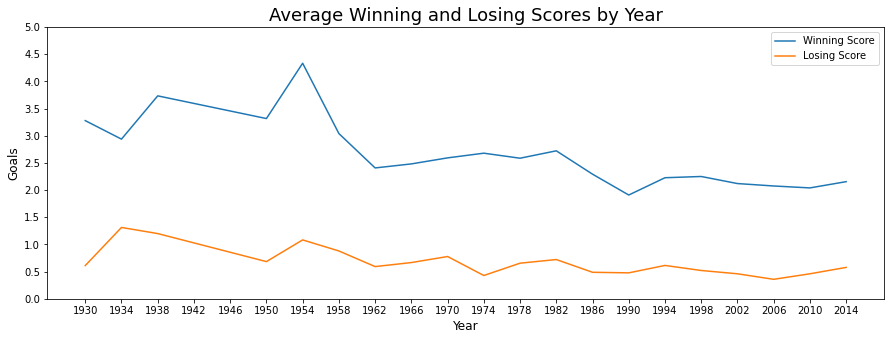

In [43]:
# Plot the winning and losing average scores for each world cup
fig, ax = plt.subplots(figsize=(15,5), facecolor=(1,1,1))

ax.plot(winning_means_by_cup)
ax.plot(losing_means_by_cup)
ax.legend(['Winning Score','Losing Score'])
ax.set_title('Average Winning and Losing Scores by Year', fontsize=18)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Goals', fontsize=12)

ax.set_xticks(np.arange(1930,2018,step=4))
ax.set_yticks(np.arange(0,(max(winning_means_by_cup)+1),step=0.5))

plt.savefig(f'{yearly_url}/Average_Scores_by_Year')

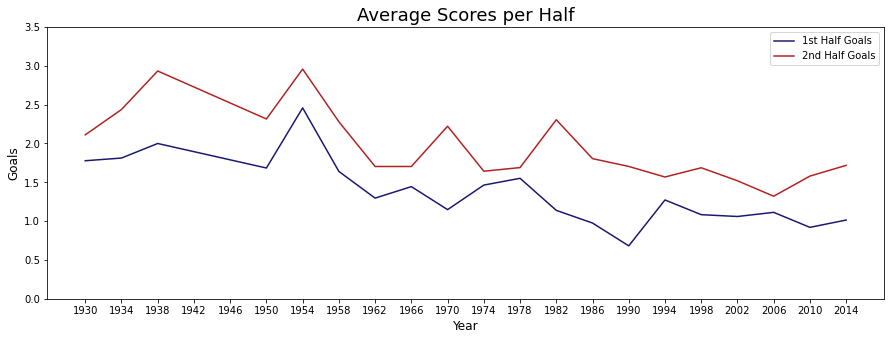

In [44]:
# Find the means for total goals in each half
half1_means = yearly_groups['winning_score_half1'].mean()+yearly_groups['losing_score_half1'].mean()
half2_means = yearly_groups['winning_score_half2'].mean()+yearly_groups['losing_score_half2'].mean()

# Find the max of half1 and half2 means to be used for graph formatting
max_yticks = max([max(half1_means),max(half2_means)])

fig, ax = plt.subplots(figsize=(15,5), facecolor=(1,1,1))

ax.plot(half1_means, color='midnightblue')
ax.plot(half2_means, color='firebrick')

ax.legend(['1st Half Goals','2nd Half Goals'])
ax.set_title('Average Scores per Half', fontsize=18)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Goals', fontsize=12)

ax.set_xticks(np.arange(1930,2018,step=4))
ax.set_yticks(np.arange(0,(max_yticks+1),step=0.5))

plt.savefig(f'{yearly_url}/Average_Scores_per_Half')

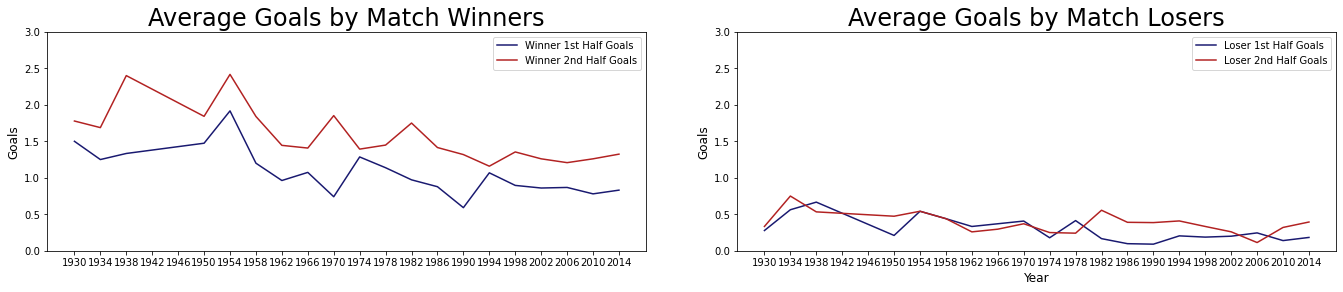

In [45]:
fig, axes = plt.subplots(1,2,figsize=(20,5), facecolor=(1,1,1))
fig.tight_layout(pad=6)

axes[0].plot(yearly_groups['winning_score_half1'].mean(), color='midnightblue')
axes[0].plot(yearly_groups['winning_score_half2'].mean(), color='firebrick')

axes[0].set_title('Average Goals by Match Winners',fontsize=24)
axes[0].legend(['Winner 1st Half Goals','Winner 2nd Half Goals'])
axes[0].set_ylabel('Goals', fontsize=12)
axes[0].set_xticks(np.arange(1930,2018,step=4))
axes[0].set_yticks(np.arange(0,3.5,step=0.5))


axes[1].plot(yearly_groups['losing_score_half1'].mean(), color='midnightblue')
axes[1].plot(yearly_groups['losing_score_half2'].mean(), color='firebrick')

axes[1].set_title('Average Goals by Match Losers',fontsize=24)
axes[1].legend(['Loser 1st Half Goals','Loser 2nd Half Goals'])
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('Goals', fontsize=12)
axes[1].set_xticks(np.arange(1930,2018,step=4))
axes[1].set_yticks(np.arange(0,3.5,step=0.5))

plt.savefig(f'{yearly_url}/Average_Goals_by_Half_(WinLoss)')

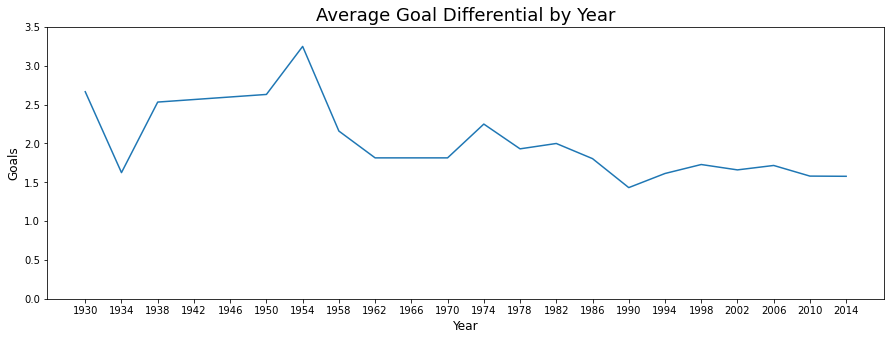

In [46]:
# Determine average goal differential for each year
fig, ax = plt.subplots(figsize=(15,5), facecolor=(1,1,1))

ax.plot(winning_means_by_cup-losing_means_by_cup)

ax.set_xticks(np.arange(1930,2018,step=4))
ax.set_yticks(np.arange(0,4,step=0.5))

ax.set_title('Average Goal Differential by Year', fontsize=18)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Goals', fontsize=12)

plt.savefig(f'{yearly_url}/Average_Goal_Differential')

## Any trends in different stages per Year?

In [47]:
stages_df = matches.copy()

In [48]:
# Consolidate third place match into the 'Final Round'
stages = stages_df['stage']
stages = stages.replace(r'Finals','Final Round',regex=True)
stages = stages.replace(r'Third place','Final Round',regex=True)

stages_df['stage'] = stages

In [49]:
def stage_value(row):
    if row['stage'] == 'Groups':
        return 1
    if row['stage'] == 'Round of 16':
        return 2
    if row['stage'] == 'Quarterfinals':
        return 3
    if row['stage'] == 'Semifinals':
        return 4
    if row['stage'] == ('Finals'):
        return 5

In [50]:
stages_df['stage_value'] = matches.apply(lambda row: stage_value(row), axis=1)

In [51]:
stage_groups = stages_df.groupby('stage')

In [52]:
stage_means = stage_groups.mean().sort_values('stage_value')

stage_means

,matchID,roundID,year,attendance,home_score_half1,away_score_half1,home_score_half2,away_score_half2,home_score_final,away_score_final,winning_score_half1,losing_score_half1,winning_score_half2,losing_score_half2,winning_score_final,losing_score_final,stage_value
stage,,,,,,,,,,,,,,,,,
Groups,59628731.64,11406540.63,1985.28,41331.76,0.74,0.43,1.04,0.56,1.78,0.99,1.08,0.25,1.48,0.29,2.56,0.54,1.00
Round of 16,77171927.31,10527797.56,1993.70,51901.87,0.53,0.29,1.10,0.64,1.63,0.93,0.70,0.13,1.39,0.44,2.09,0.57,2.00
Quarterfinals,63140458.73,8613801.44,1979.64,45697.48,0.68,0.36,1.11,0.58,1.79,0.94,0.77,0.31,1.27,0.41,2.03,0.72,3.00
Semifinals,57880209.67,7896883.11,1978.22,59053.33,0.56,0.61,1.56,0.92,2.11,1.53,0.94,0.22,1.81,0.67,2.75,0.89,4.00
Final Round,46303386.47,6318325.91,1975.33,68254.80,0.91,0.76,1.51,0.69,2.42,1.44,1.14,0.50,1.68,0.55,2.82,1.05,5.00


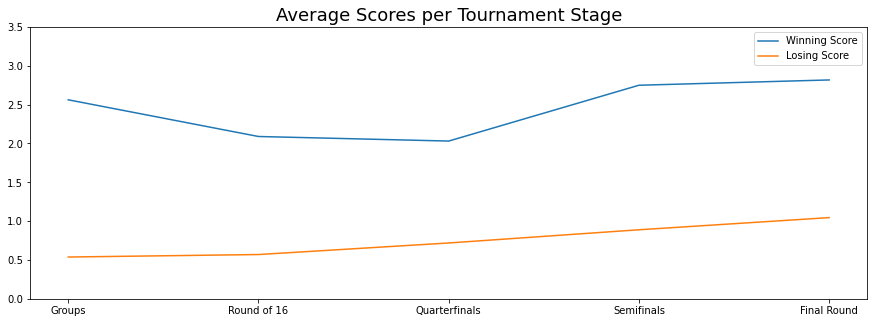

In [53]:
fig, ax = plt.subplots(figsize=(15,5), facecolor=(1,1,1))

ax.plot(stage_means['winning_score_final'])
ax.plot(stage_means['losing_score_final'])

ax.set_title('Average Scores per Tournament Stage', fontsize=18)
ax.legend(['Winning Score','Losing Score'])

ax.set_yticks(np.arange(0,4,step=0.5))

plt.savefig(f'{yearly_url}/Average_Scores_by_Stage')

# 2: Best performances by host country? (furthest stage)

In [54]:
host_team_df = matches.loc[(matches['home_name']==matches['country'])|(matches['away_name']==matches['country'])]
host_team_df[['stage','country','home_name','away_name','winner']].sample(5)

,stage,country,home_name,away_name,winner
92,Groups,Switzerland,Switzerland,Italy,Switzerland
537,Groups,France,France,Saudi Arabia,France
635,Round of 16,Japan,Japan,Turkey,Turkey
24,Groups,Italy,Italy,United States,Italy
308,Finals,Argentina,Argentina,Netherlands,Argentina


In [55]:
host_team_finals = host_team_df[['year','country','winner']].loc[host_team_df['stage']=='Finals']
host_team_finals

,year,country,winner
17,1930,Uruguay,Uruguay
34,1934,Italy,Italy
70,1950,Brazil,Brazil
71,1950,Brazil,Brazil
74,1950,Brazil,Uruguay
135,1958,Sweden,Brazil
199,1966,England,England
308,1978,Argentina,Argentina
579,1998,France,France


In [56]:
host_team_df['furthest_result'] = host_team_df['stage']

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
def champion(row):
    if (row['stage']=='Finals') & (row['winner']==row['country']):
        return 'Champion'
    else:
        return row['stage']

In [58]:
host_team_df['furthest_result'] = host_team_df.apply(lambda row: champion(row), axis=1)

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
def host_stage_value(row):
    if row['furthest_result'] == 'Groups':
        return 1
    if row['furthest_result'] == 'Round of 16':
        return 2
    if row['furthest_result'] == 'Quarterfinals':
        return 3
    if row['furthest_result'] == 'Semifinals':
        return 4
    if row['furthest_result'] == 'Third place':
        return 5
    if row['furthest_result'] == 'Finals':
        return 6
    if row['furthest_result'] == 'Champion':
        return 7

In [60]:
# Add in the stage value column and then sort it so that highest stage value goes first
host_team_df['stage_value'] = host_team_df.apply(lambda row: host_stage_value(row), axis=1)

host_team_df = host_team_df.sort_values('stage_value', ascending=False)

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
host_team_df = host_team_df.reset_index(drop=True)

In [62]:
host_team_df

,matchID,roundID,match_date,year,country,city,stadium,attendance,stage,home_name,...,away_score_final,winner,winning_score_half1,losing_score_half1,winning_score_half2,losing_score_half2,winning_score_final,losing_score_final,furthest_result,stage_value
0,1189,209,1950-07-09,1950,Brazil,Rio de Janeiro,Maracanã - Estádio Jornalista Mário Filho,138886.00,Finals,Brazil,...,1,Brazil,3.00,0.00,4.00,1.00,7.00,1.00,Champion,7
1,1087,405,1930-07-30,1930,Uruguay,Montevideo,Estadio Centenario,68346.00,Finals,Uruguay,...,2,Uruguay,1.00,2.00,3.00,0.00,4.00,2.00,Champion,7
2,1633,3478,1966-07-30,1966,England,London,Wembley Stadium,96924.00,Finals,England,...,2,England,0.00,0.00,4.00,2.00,4.00,2.00,Champion,7
3,2198,639,1978-06-25,1978,Argentina,Buenos Aires,El Monumental - Estadio Monumental Antonio Ves...,71483.00,Finals,Argentina,...,1,Argentina,0.00,0.00,3.00,1.00,3.00,1.00,Champion,7
4,1134,3490,1934-06-10,1934,Italy,Rome,Nazionale PNF,55000.00,Finals,Italy,...,1,Italy,0.00,0.00,2.00,1.00,2.00,1.00,Champion,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2200,278,1978-06-10,1978,Argentina,Buenos Aires,El Monumental - Estadio Monumental Antonio Ves...,71712.00,Groups,Italy,...,0,Italy,0.00,0.00,1.00,0.00,1.00,0.00,Groups,1
106,2197,278,1978-06-06,1978,Argentina,Buenos Aires,El Monumental - Estadio Monumental Antonio Ves...,71666.00,Groups,Argentina,...,1,Argentina,1.00,0.00,1.00,1.00,2.00,1.00,Groups,1
107,2199,278,1978-06-02,1978,Argentina,Buenos Aires,El Monumental - Estadio Monumental Antonio Ves...,71615.00,Groups,Argentina,...,1,Argentina,1.00,1.00,1.00,0.00,2.00,1.00,Groups,1
108,1752,250,1970-06-11,1970,Mexico,Mexico City,Estadio Azteca,108192.00,Groups,Mexico,...,0,Mexico,1.00,0.00,0.00,0.00,1.00,0.00,Groups,1


In [63]:
keys = []
values = []

In [64]:
for i in range(len(host_team_df)):
    if host_team_df['country'][i] not in keys:
        keys.append(host_team_df['country'][i])
        values.append(host_team_df['furthest_result'][i])

In [65]:
print(keys)
print(values)

['Brazil', 'Uruguay', 'England', 'Argentina', 'Italy', 'France', 'Sweden', 'Germany', 'South Korea', 'Chile', 'Mexico', 'Switzerland', 'Spain', 'Japan', 'United States', 'South Africa']
['Champion', 'Champion', 'Champion', 'Champion', 'Champion', 'Champion', 'Finals', 'Third place', 'Third place', 'Third place', 'Quarterfinals', 'Quarterfinals', 'Round of 16', 'Round of 16', 'Round of 16', 'Groups']


In [66]:
host_results_dict = {}

for i in range(len(keys)):
    host_results_dict[keys[i]]=values[i]

In [67]:
host_results_dict

{'Brazil': 'Champion',
 'Uruguay': 'Champion',
 'England': 'Champion',
 'Argentina': 'Champion',
 'Italy': 'Champion',
 'France': 'Champion',
 'Sweden': 'Finals',
 'Germany': 'Third place',
 'South Korea': 'Third place',
 'Chile': 'Third place',
 'Mexico': 'Quarterfinals',
 'Switzerland': 'Quarterfinals',
 'Spain': 'Round of 16',
 'Japan': 'Round of 16',
 'United States': 'Round of 16',
 'South Africa': 'Groups'}

In [68]:
host_country_results = pd.DataFrame.from_dict(host_results_dict, orient='index')

host_country_results = host_country_results.rename(columns={0:'Result'})

In [69]:
path = 'C:/Users/Ian/Desktop/Misc_Projects/World_Cup_Analysis/Analysis/Country_Comparisons/Host_Data/'

host_country_results.to_csv(path+'Best_Results_as_Host.csv')

dfi.export(host_country_results, filename=f"{path}../README_images/2_Best_Results_as_Host.png")

# 3: Which host city has seen the most goals?

In [70]:
host_city_df = matches.copy()

In [71]:
city_list = host_city_df['city'].unique()

In [72]:
host_city_df.columns

Index(['matchID', 'roundID', 'match_date', 'year', 'country', 'city',
       'stadium', 'attendance', 'stage', 'home_name', 'home_init', 'away_name',
       'away_init', 'home_score_half1', 'away_score_half1', 'home_score_half2',
       'away_score_half2', 'home_score_final', 'away_score_final', 'winner',
       'winning_score_half1', 'losing_score_half1', 'winning_score_half2',
       'losing_score_half2', 'winning_score_final', 'losing_score_final'],
      dtype='object')

In [73]:
host_city_df['total_goals'] = host_city_df['winning_score_final'] + host_city_df['losing_score_final']

In [74]:
# Initialize a 'location' column
host_city_df['location']=0

In [75]:
city = host_city_df['city']
country = host_city_df['country']

for i in range(len(host_city_df)):
    host_city_df['location'][i] = f"{city[i]}, {country[i]}"

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [76]:
host_city_df

,matchID,roundID,match_date,year,country,city,stadium,attendance,stage,home_name,...,away_score_final,winner,winning_score_half1,losing_score_half1,winning_score_half2,losing_score_half2,winning_score_final,losing_score_final,total_goals,location
0,1096,201,1930-07-13,1930,Uruguay,Montevideo,Pocitos,4444.00,Groups,France,...,1,France,3.00,0.00,1.00,1.00,4.00,1.00,5.00,"Montevideo, Uruguay"
1,1090,201,1930-07-13,1930,Uruguay,Montevideo,Parque Central,18346.00,Groups,United States,...,0,United States,2.00,0.00,1.00,0.00,3.00,0.00,3.00,"Montevideo, Uruguay"
2,1093,201,1930-07-14,1930,Uruguay,Montevideo,Parque Central,24059.00,Groups,Yugoslavia,...,1,Yugoslavia,2.00,0.00,0.00,1.00,2.00,1.00,3.00,"Montevideo, Uruguay"
3,1098,201,1930-07-14,1930,Uruguay,Montevideo,Pocitos,2549.00,Groups,Romania,...,1,Romania,1.00,0.00,2.00,1.00,3.00,1.00,4.00,"Montevideo, Uruguay"
4,1085,201,1930-07-15,1930,Uruguay,Montevideo,Parque Central,23409.00,Groups,Argentina,...,0,Argentina,0.00,0.00,1.00,0.00,1.00,0.00,1.00,"Montevideo, Uruguay"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,300186488,255953,2014-07-05,2014,Brazil,Salvador,Arena Fonte Nova,51179.00,Quarterfinals,Netherlands,...,0,Netherlands,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"Salvador, Brazil"
848,300186474,255955,2014-07-08,2014,Brazil,Belo Horizonte,Estadio Mineirao,58141.00,Semifinals,Brazil,...,7,Germany,5.00,0.00,2.00,1.00,7.00,1.00,8.00,"Belo Horizonte, Brazil"
849,300186490,255955,2014-07-09,2014,Brazil,São Paulo,Arena de Sao Paulo,63267.00,Semifinals,Netherlands,...,0,Argentina,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"São Paulo, Brazil"
850,300186502,255957,2014-07-12,2014,Brazil,Brasília,Estadio Nacional,68034.00,Third place,Brazil,...,3,Netherlands,2.00,0.00,1.00,0.00,3.00,0.00,3.00,"Brasília, Brazil"


In [77]:
cols_to_keep = ['location','match_date', 'year','attendance',
               'winning_score_half1', 'losing_score_half1', 
                'winning_score_half2','losing_score_half2', 
                'winning_score_final', 'losing_score_final', 'total_goals']

score_cols = ['winning_score_half1', 'losing_score_half1', 
                'winning_score_half2','losing_score_half2', 
                'winning_score_final', 'losing_score_final', 'total_goals']

In [78]:
host_city_counts = host_city_df[cols_to_keep].groupby('location').count()
host_city_sums = host_city_df[cols_to_keep].groupby('location').sum()
host_city_avgs = host_city_df[cols_to_keep].groupby('location').mean()

In [79]:
most_goals_df = host_city_sums[score_cols].sort_values('total_goals', ascending=False)

In [80]:
no_goals_df = host_city_sums['total_goals'].loc[host_city_sums['total_goals']==0]

no_goals_df

location
Eskilstuna, Sweden   0.00
Palermo, Italy       0.00
Vigo, Spain          0.00
Name: total_goals, dtype: float64

In [81]:
counts_and_sums = host_city_counts.join(host_city_sums, lsuffix='_counts',rsuffix='_totals')

In [82]:
counts_and_sums.columns

Index(['match_date', 'year_counts', 'attendance_counts',
       'winning_score_half1_counts', 'losing_score_half1_counts',
       'winning_score_half2_counts', 'losing_score_half2_counts',
       'winning_score_final_counts', 'losing_score_final_counts',
       'total_goals_counts', 'year_totals', 'attendance_totals',
       'winning_score_half1_totals', 'losing_score_half1_totals',
       'winning_score_half2_totals', 'losing_score_half2_totals',
       'winning_score_final_totals', 'losing_score_final_totals',
       'total_goals_totals'],
      dtype='object')

In [83]:
counts_and_sums = counts_and_sums[['match_date','attendance_totals','winning_score_half1_totals', 'losing_score_half1_totals',
                                    'winning_score_half2_totals', 'losing_score_half2_totals', 'winning_score_final_totals', 
                                    'losing_score_final_totals', 'total_goals_totals']]

### Least goals seen on average

In [84]:
# Sort by least total goals, then by match count (i.e. lower average goals appear first)
saddest_counts_and_sums = counts_and_sums.sort_values(['total_goals_totals', 'match_date'], ascending=[True,False])

In [85]:
saddest_counts_and_sums['average_goals'] = saddest_counts_and_sums['total_goals_totals']/saddest_counts_and_sums['match_date']

In [86]:
# Only keep places with average goals less than 2, since a city that's only hosted once with a 3+ goal game was still exciting
saddest_counts_and_sums = saddest_counts_and_sums.loc[(saddest_counts_and_sums['average_goals']<2)]

In [87]:
saddest_counts_and_sums = saddest_counts_and_sums[['match_date','average_goals','total_goals_totals']].sort_values(['average_goals','total_goals_totals'])

In [88]:
saddest_counts_and_sums.head()

,match_date,average_goals,total_goals_totals
location,,,
"Palermo, Italy",3,0.00,0.00
"Vigo, Spain",3,0.00,0.00
"Eskilstuna, Sweden",1,0.00,0.00
"Cagliari, Italy",3,0.33,1.00
"Zaragoza, Spain",3,0.33,1.00


In [89]:
saddest_counts_and_sums = saddest_counts_and_sums.rename(columns = {'match_date':'Match Count', 
                                                                    'average_goals':'Average Goals Seen',
                                                                    'total_goals_totals':'Total Goals Seen'})

In [90]:
# Save csv and image of the top10 for readme
saddest_counts_and_sums.to_csv(path+'Least_Exciting_Host_Cities_(Average_Goals).csv')

dfi.export(saddest_counts_and_sums.head(10), path+'../README_images/3a_Least_Exciting_Host_Cities(Average_Goals).png')

### Most goals seen on average

In [91]:
# Most goals, secondary sorting by least number of matches (i.e. better average goals)
happiest_counts_and_sums = counts_and_sums.sort_values(['total_goals_totals', 'match_date'], ascending=[False,True])

In [92]:
happiest_counts_and_sums['average_goals'] = happiest_counts_and_sums['total_goals_totals']/happiest_counts_and_sums['match_date']

In [93]:
happiest_counts_and_sums = happiest_counts_and_sums.loc[(happiest_counts_and_sums['average_goals']>2)&
                                                        (happiest_counts_and_sums['total_goals_totals']>10)]

In [94]:
happiest_counts_and_sums = happiest_counts_and_sums[['match_date',
                                                     'average_goals',
                                                     'total_goals_totals']]

In [95]:
happiest_counts_and_sums['average_goals_rounded'] = round(happiest_counts_and_sums['average_goals'])

In [96]:
happiest_counts_and_sums = happiest_counts_and_sums.sort_values(['average_goals_rounded','total_goals_totals'],ascending=[False,False])

In [97]:
happiest_counts_and_sums = happiest_counts_and_sums.rename(columns = {'match_date':'Match Count',
                                                                      'average_goals':'Average Goals Seen',
                                                                      'total_goals_totals':'Total Goals Seen'})

In [98]:
happiest_counts_and_sums = happiest_counts_and_sums.drop('average_goals_rounded', axis=1)

In [99]:
# Save csv and image of the top10 for readme
happiest_counts_and_sums.to_csv(path+'Most_Exciting_Host_Cities_(Average_Goals).csv')

dfi.export(happiest_counts_and_sums.head(10), path+'../README_images/3b_Most_Exciting_Host_Cities_(Average_Goals).png')

# 4: Attendance groups+graph

## Attendance based on year/world cup

In [100]:
year_groups = host_city_df.groupby('year')

In [101]:
year_groups_totals = year_groups.sum()
year_groups_averages = year_groups.mean()

In [102]:
path = 'C:/Users/Ian/Desktop/Misc_Projects/World_Cup_Analysis/Analysis/Country_Comparisons/'

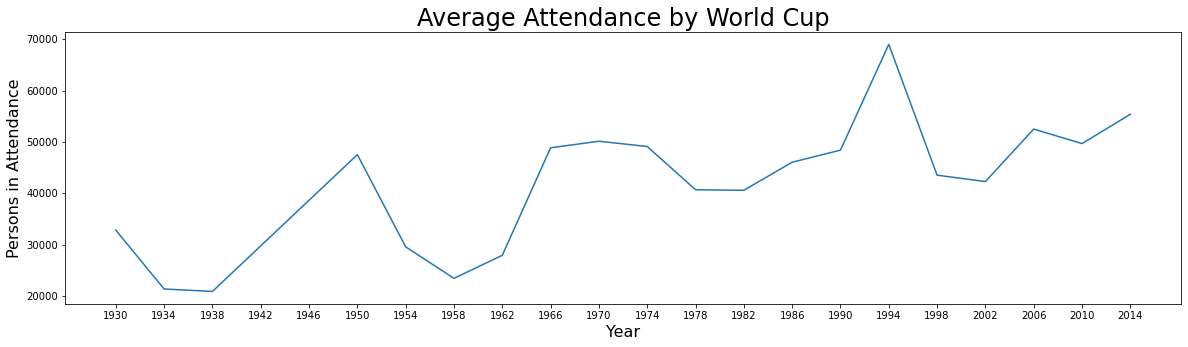

In [103]:
fig, ax = plt.subplots(figsize=(20,5), facecolor=(1,1,1))

# Plot the average attendance as seen each year
ax.plot(year_groups_averages.index, year_groups_averages['attendance'])

ax.set_title('Average Attendance by World Cup', fontsize=24)
ax.set_xticks(np.arange(1930,2018, step=4))
ax.set_xlabel('Year',fontsize=16)

ax.set_ylabel('Persons in Attendance', fontsize=16)

plt.savefig(path+'Attendance_by_WC')

## Attendance based on city host

In [104]:
city_groups = host_city_df.groupby('location')

In [105]:
city_groups_averages = city_groups.mean()

city_groups_averages = city_groups_averages.sort_values('attendance', ascending=False)

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


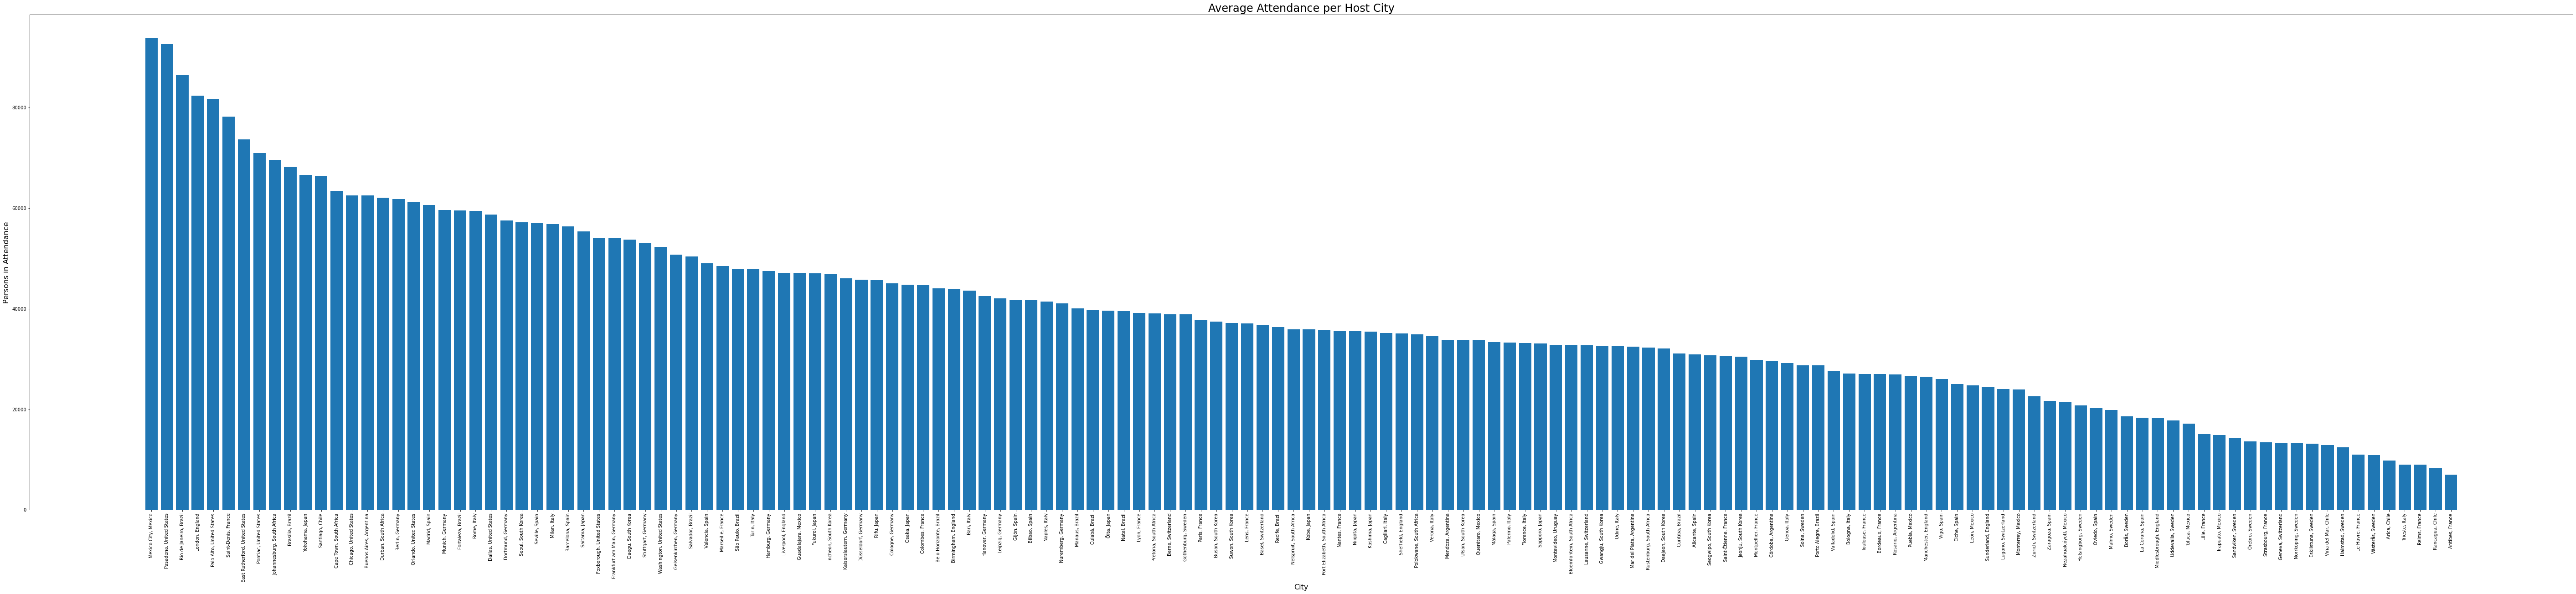

In [106]:
fig, ax = plt.subplots(figsize=(100,20), facecolor=(1,1,1))

# Plot the average attendance as seen each year
ax.bar(city_groups_averages.index, city_groups_averages['attendance'])

ax.set_title('Average Attendance per Host City', fontsize=24)
ax.set_xlabel('City',fontsize=16)
ax.set_xticklabels(city_groups_averages.index, rotation=90)

ax.set_ylabel('Persons in Attendance', fontsize=16)

plt.savefig(path+'Host_Data/Attendance_by_Host_City')

## Attendance based on stage of the competition

In [107]:
stage_groups = host_city_df.groupby('stage')

In [108]:
stage_groups_averages = stage_groups.mean()

stage_groups_averages = stage_groups_averages.sort_values('attendance',ascending=False)

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


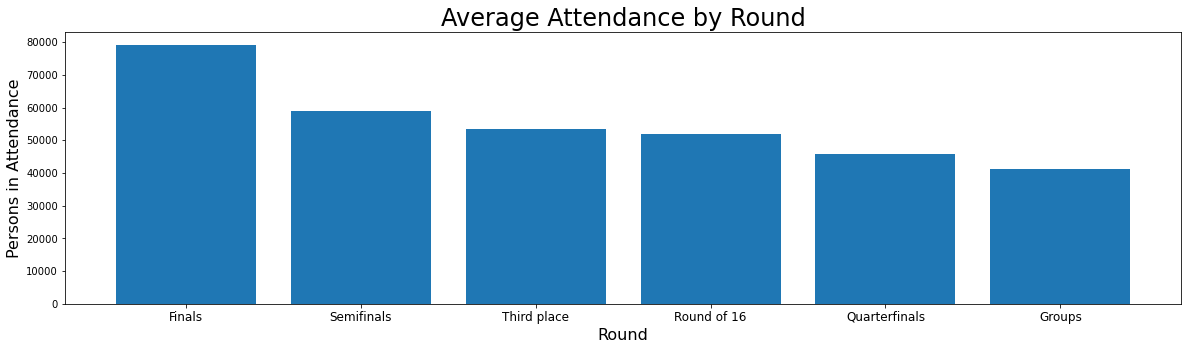

In [109]:
fig, ax = plt.subplots(figsize=(20,5), facecolor=(1,1,1))

# Plot the average attendance as seen each year
ax.bar(stage_groups_averages.index, stage_groups_averages['attendance'])

ax.set_title('Average Attendance by Round', fontsize=24)
ax.set_xlabel('Round',fontsize=16)
ax.set_xticklabels(stage_groups_averages.index, fontsize=12)

ax.set_ylabel('Persons in Attendance', fontsize=16)


plt.savefig(path+'Attendance_by_Stage')

# 5: Best performance for each participant?

In [110]:
team_df = matches.copy()

In [111]:
team_df['home_result'] = team_df['stage']
team_df['away_result'] = team_df['stage']

In [112]:
# Redefine champion function now that we need to separate home/away results
def champion(row, team):
    if (row['stage']=='Finals') & (row['winner']==row[team]):
        return 'Champion'
    else:
        return row['stage']

In [113]:
team_df.head()

,matchID,roundID,match_date,year,country,city,stadium,attendance,stage,home_name,...,away_score_final,winner,winning_score_half1,losing_score_half1,winning_score_half2,losing_score_half2,winning_score_final,losing_score_final,home_result,away_result
0,1096,201,1930-07-13,1930,Uruguay,Montevideo,Pocitos,4444.00,Groups,France,...,1,France,3.00,0.00,1.00,1.00,4.00,1.00,Groups,Groups
1,1090,201,1930-07-13,1930,Uruguay,Montevideo,Parque Central,18346.00,Groups,United States,...,0,United States,2.00,0.00,1.00,0.00,3.00,0.00,Groups,Groups
2,1093,201,1930-07-14,1930,Uruguay,Montevideo,Parque Central,24059.00,Groups,Yugoslavia,...,1,Yugoslavia,2.00,0.00,0.00,1.00,2.00,1.00,Groups,Groups
3,1098,201,1930-07-14,1930,Uruguay,Montevideo,Pocitos,2549.00,Groups,Romania,...,1,Romania,1.00,0.00,2.00,1.00,3.00,1.00,Groups,Groups
4,1085,201,1930-07-15,1930,Uruguay,Montevideo,Parque Central,23409.00,Groups,Argentina,...,0,Argentina,0.00,0.00,1.00,0.00,1.00,0.00,Groups,Groups


In [114]:
# Use the previously made "champion" function to add an additional value for each champion
team_df['home_result'] = team_df.apply(lambda row: champion(row, 'home_name'), axis=1)
team_df['away_result'] = team_df.apply(lambda row: champion(row, 'away_name'), axis=1)

In [115]:
team_df.loc[team_df['stage']=='Finals']

,matchID,roundID,match_date,year,country,city,stadium,attendance,stage,home_name,...,away_score_final,winner,winning_score_half1,losing_score_half1,winning_score_half2,losing_score_half2,winning_score_final,losing_score_final,home_result,away_result
17,1087,405,1930-07-30,1930,Uruguay,Montevideo,Estadio Centenario,68346.00,Finals,Uruguay,...,2,Uruguay,1.00,2.00,3.00,0.00,4.00,2.00,Champion,Finals
34,1134,3490,1934-06-10,1934,Italy,Rome,Nazionale PNF,55000.00,Finals,Italy,...,1,Italy,0.00,0.00,2.00,1.00,2.00,1.00,Champion,Finals
52,1174,3487,1938-06-19,1938,France,Colombes,Stade Olympique,45000.00,Finals,Italy,...,2,Italy,3.00,1.00,1.00,1.00,4.00,2.00,Champion,Finals
69,1207,209,1950-07-09,1950,Brazil,São Paulo,Pacaembu,44802.00,Finals,Uruguay,...,2,Draw,NaN,NaN,NaN,NaN,NaN,NaN,Finals,Finals
70,1189,209,1950-07-09,1950,Brazil,Rio de Janeiro,Maracanã - Estádio Jornalista Mário Filho,138886.00,Finals,Brazil,...,1,Brazil,3.00,0.00,4.00,1.00,7.00,1.00,Champion,Finals
71,1186,209,1950-07-13,1950,Brazil,Rio de Janeiro,Maracanã - Estádio Jornalista Mário Filho,152772.00,Finals,Brazil,...,1,Brazil,3.00,0.00,3.00,1.00,6.00,1.00,Champion,Finals
72,1231,209,1950-07-13,1950,Brazil,São Paulo,Pacaembu,7987.00,Finals,Uruguay,...,2,Uruguay,1.00,2.00,2.00,0.00,3.00,2.00,Champion,Finals
73,1206,209,1950-07-16,1950,Brazil,São Paulo,Pacaembu,11227.00,Finals,Sweden,...,1,Sweden,2.00,0.00,1.00,1.00,3.00,1.00,Champion,Finals
74,1190,209,1950-07-16,1950,Brazil,Rio de Janeiro,Maracanã - Estádio Jornalista Mário Filho,173850.00,Finals,Uruguay,...,1,Uruguay,0.00,0.00,2.00,1.00,2.00,1.00,Champion,Finals
100,1278,3484,1954-07-04,1954,Switzerland,Berne,Wankdorf Stadium,62500.00,Finals,West Germany,...,2,West Germany,2.00,2.00,1.00,0.00,3.00,2.00,Champion,Finals


### Fix values for the 1950 world cup (only world cup where finals were a group stage, not just 1 match)

In [116]:
team_df.loc[(team_df['stage']=='Finals')&(team_df['year']==1950)]

,matchID,roundID,match_date,year,country,city,stadium,attendance,stage,home_name,...,away_score_final,winner,winning_score_half1,losing_score_half1,winning_score_half2,losing_score_half2,winning_score_final,losing_score_final,home_result,away_result
69,1207,209,1950-07-09,1950,Brazil,São Paulo,Pacaembu,44802.00,Finals,Uruguay,...,2,Draw,NaN,NaN,NaN,NaN,NaN,NaN,Finals,Finals
70,1189,209,1950-07-09,1950,Brazil,Rio de Janeiro,Maracanã - Estádio Jornalista Mário Filho,138886.00,Finals,Brazil,...,1,Brazil,3.00,0.00,4.00,1.00,7.00,1.00,Champion,Finals
71,1186,209,1950-07-13,1950,Brazil,Rio de Janeiro,Maracanã - Estádio Jornalista Mário Filho,152772.00,Finals,Brazil,...,1,Brazil,3.00,0.00,3.00,1.00,6.00,1.00,Champion,Finals
72,1231,209,1950-07-13,1950,Brazil,São Paulo,Pacaembu,7987.00,Finals,Uruguay,...,2,Uruguay,1.00,2.00,2.00,0.00,3.00,2.00,Champion,Finals
73,1206,209,1950-07-16,1950,Brazil,São Paulo,Pacaembu,11227.00,Finals,Sweden,...,1,Sweden,2.00,0.00,1.00,1.00,3.00,1.00,Champion,Finals
74,1190,209,1950-07-16,1950,Brazil,Rio de Janeiro,Maracanã - Estádio Jornalista Mário Filho,173850.00,Finals,Uruguay,...,1,Uruguay,0.00,0.00,2.00,1.00,2.00,1.00,Champion,Finals


In [117]:
team_df['home_result'].iloc[69] = 'Champion'
team_df['away_result'].iloc[69] = 'Finals'

team_df['home_result'].iloc[70] = 'Finals'
team_df['away_result'].iloc[70] = 'Finals'

team_df['home_result'].iloc[71] = np.NaN
team_df['away_result'].iloc[71] = np.NaN

team_df['home_result'].iloc[72] = np.NaN
team_df['away_result'].iloc[72] = np.NaN

team_df['home_result'].iloc[73] = np.NaN
team_df['away_result'].iloc[73] = np.NaN

team_df['home_result'].iloc[74] = np.NaN
team_df['away_result'].iloc[74] = np.NaN

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [118]:
def stage_value(row, team):
    if row[team] == 'Groups':
        return 1
    if row[team] == 'Round of 16':
        return 2
    if row[team] == 'Quarterfinals':
        return 3
    if row[team] == 'Semifinals':
        return 4
    if row[team] == 'Third place':
        return 5
    if row[team] == 'Finals':
        return 6
    if row[team] == 'Champion':
        return 7

In [119]:
team_df['home_result_value'] = team_df.apply(lambda row: stage_value(row,'home_result'), axis=1)
team_df['away_result_value'] = team_df.apply(lambda row: stage_value(row,'away_result'), axis=1)

In [120]:
team_df.iloc[69]
team_df.iloc[70]
# team_df.iloc[74]

matchID                                                     1189
roundID                                                      209
match_date                                            1950-07-09
year                                                        1950
country                                                   Brazil
city                                              Rio de Janeiro
stadium                Maracanã - Estádio Jornalista Mário Filho
attendance                                             138886.00
stage                                                     Finals
home_name                                                 Brazil
home_init                                                    BRA
away_name                                                 Sweden
away_init                                                    SWE
home_score_half1                                               3
away_score_half1                                               0
home_score_half2         

## Best performance for each participant

In [121]:
# Filter the dataframe into various dataframes for each individual country
team_list = []

team_list

[]

In [122]:
# Add each of the unique home team names
for i in range(len(team_df)):
    if team_df['home_name'][i] not in team_list:
        team_list.append(team_df['home_name'][i])
        
team_list

['France',
 'United States',
 'Yugoslavia',
 'Romania',
 'Argentina',
 'Chile',
 'Uruguay',
 'Brazil',
 'Paraguay',
 'Austria',
 'Hungary',
 'Switzerland',
 'Sweden',
 'Germany',
 'Spain',
 'Italy',
 'Czechoslovakia',
 'Cuba',
 'England',
 'West Germany',
 'Turkey',
 'Soviet Union',
 'Northern Ireland',
 'Mexico',
 'Wales',
 'Portugal',
 'North Korea',
 'Peru',
 'Belgium',
 'Bulgaria',
 'East Germany',
 'Zaire',
 'Poland',
 'Australia',
 'Scotland',
 'Netherlands',
 'Haiti',
 'Tunisia',
 'Algeria',
 'Honduras',
 'Canada',
 'Morocco',
 'South Korea',
 'Iraq',
 'Denmark',
 'United Arab Emirates',
 'Costa Rica',
 'Cameroon',
 'Republic of Ireland',
 'Colombia',
 'Norway',
 'Nigeria',
 'Saudi Arabia',
 'Bolivia',
 'Russia',
 'Greece',
 'Jamaica',
 'South Africa',
 'Japan',
 'Croatia',
 'China PR',
 'Senegal',
 'Slovenia',
 'Ecuador',
 'Trinidad and Tobago',
 'Serbia',
 'Angola',
 'Czech Republic',
 'Togo',
 'Iran',
 "Cote d'Ivoire",
 'Ghana',
 'Ukraine',
 'New Zealand',
 'Slovakia',
 'Bosn

In [123]:
# Add each of the unique home away names
for i in range(len(team_df)):
    if team_df['away_name'][i] not in team_list:
        team_list.append(team_df['away_name'][i])
        
team_list

['France',
 'United States',
 'Yugoslavia',
 'Romania',
 'Argentina',
 'Chile',
 'Uruguay',
 'Brazil',
 'Paraguay',
 'Austria',
 'Hungary',
 'Switzerland',
 'Sweden',
 'Germany',
 'Spain',
 'Italy',
 'Czechoslovakia',
 'Cuba',
 'England',
 'West Germany',
 'Turkey',
 'Soviet Union',
 'Northern Ireland',
 'Mexico',
 'Wales',
 'Portugal',
 'North Korea',
 'Peru',
 'Belgium',
 'Bulgaria',
 'East Germany',
 'Zaire',
 'Poland',
 'Australia',
 'Scotland',
 'Netherlands',
 'Haiti',
 'Tunisia',
 'Algeria',
 'Honduras',
 'Canada',
 'Morocco',
 'South Korea',
 'Iraq',
 'Denmark',
 'United Arab Emirates',
 'Costa Rica',
 'Cameroon',
 'Republic of Ireland',
 'Colombia',
 'Norway',
 'Nigeria',
 'Saudi Arabia',
 'Bolivia',
 'Russia',
 'Greece',
 'Jamaica',
 'South Africa',
 'Japan',
 'Croatia',
 'China PR',
 'Senegal',
 'Slovenia',
 'Ecuador',
 'Trinidad and Tobago',
 'Serbia',
 'Angola',
 'Czech Republic',
 'Togo',
 'Iran',
 "Cote d'Ivoire",
 'Ghana',
 'Ukraine',
 'New Zealand',
 'Slovakia',
 'Bosn

In [124]:
team_list.sort()
team_list[:5]

['Algeria', 'Angola', 'Argentina', 'Australia', 'Austria']

In [125]:
df = {}
base_dir = 'C:/Users/Ian/Desktop/Misc_Projects/World_Cup_Analysis/Analysis/Individual_Country_Performances/'

for team in team_list:
    df[team] = team_df.loc[(team_df['home_name']==team)|(team_df['away_name']==team)]
#     path = base_dir+team
#     os.mkdir(path)
    try:
        path = base_dir+team
        os.mkdir(path)
    except:
        print(f'Error Creating New Folder for {team}. Check if one already exists.')
        
try:
    path = base_dir+'All Countries'
    os.mkdir(path)
except:
    print(f'Error Creating New Folder for {team}. Check if one already exists.')

In [126]:
# Check that the dataframe got made properly
df['United States'][['home_name','away_name']]

,home_name,away_name
1,United States,Belgium
7,United States,Paraguay
15,Argentina,United States
24,Italy,United States
55,Spain,United States
62,United States,England
68,Chile,United States
416,United States,Czechoslovakia
427,Italy,United States
441,Austria,United States


In [127]:
keys = []
values = []

In [128]:
for team in team_list:
    # Reset index for each team dataframe so the for loop works properly
    df[team].reset_index(inplace=True)
    
    # Make column specifically for {team} values
    # Need to make the distinction of home/away values here to account for finals win having different value than finals loss
    home_team = df[team]['home_name']
    away_team = df[team]['away_name']

    home_values = df[team]['home_result_value']
    away_values = df[team]['away_result_value']

    team_match_values = []
    
    # Go through each row of the team's dataframe and append that team's match value to a list
    for i in range(len(df[team])):
        if home_team[i]==team:
            team_match_values.append(home_values[i])
        else:
            team_match_values.append(away_values[i])
    
    # Create a new column in the dataframe with the team's match values
    df[team][f'{team}_result_value'] = team_match_values

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [129]:
for team in team_list:
    furthest_result_value = max(df[team][f'{team}_result_value'])
    
    if furthest_result_value == 1:
        furthest_result = 'Groups'
    elif furthest_result_value == 2:
        furthest_result = 'Round of 16'
    elif furthest_result_value == 3:
        furthest_result = 'Quarterfinals'
    elif furthest_result_value == 4:
        furthest_result = 'Semifinals'
    elif furthest_result_value == 5:
        furthest_result = 'Semifinals'
    elif furthest_result_value == 6:
        furthest_result = 'Finals'
    elif furthest_result_value == 7:
        furthest_result = 'Champions'
        

    keys.append(team)
    values.append(furthest_result)

In [130]:
furthest_result_dict = {}

for i in range(len(keys)):
    furthest_result_dict[keys[i]]=values[i]
    
furthest_result_dict

{'Algeria': 'Round of 16',
 'Angola': 'Groups',
 'Argentina': 'Champions',
 'Australia': 'Round of 16',
 'Austria': 'Semifinals',
 'Belgium': 'Semifinals',
 'Bolivia': 'Groups',
 'Bosnia and Herzegovina': 'Groups',
 'Brazil': 'Champions',
 'Bulgaria': 'Semifinals',
 'Cameroon': 'Quarterfinals',
 'Canada': 'Groups',
 'Chile': 'Semifinals',
 'China PR': 'Groups',
 'Colombia': 'Quarterfinals',
 'Costa Rica': 'Quarterfinals',
 "Cote d'Ivoire": 'Groups',
 'Croatia': 'Semifinals',
 'Cuba': 'Quarterfinals',
 'Czech Republic': 'Groups',
 'Czechoslovakia': 'Finals',
 'Denmark': 'Quarterfinals',
 'Dutch West Indies': 'Groups',
 'East Germany': 'Round of 16',
 'Ecuador': 'Round of 16',
 'Egypt': 'Groups',
 'El Salvador': 'Groups',
 'England': 'Champions',
 'France': 'Champions',
 'Germany': 'Champions',
 'Ghana': 'Quarterfinals',
 'Greece': 'Round of 16',
 'Haiti': 'Groups',
 'Honduras': 'Groups',
 'Hungary': 'Finals',
 'Iran': 'Groups',
 'Iraq': 'Groups',
 'Israel': 'Groups',
 'Italy': 'Champion

In [131]:
participating_country_results = pd.DataFrame.from_dict(furthest_result_dict, orient='index')

In [132]:
participating_country_results = participating_country_results.rename(columns={0:'Result'})

In [133]:
path = 'C:/Users/Ian/Desktop/Misc_Projects/World_Cup_Analysis/Analysis/Country_Comparisons/'

try:
    os.mkdir(path)
except:
    print(f'Error Creating New Folder for Furthest Results. Check if one already exists.')

Error Creating New Folder for Furthest Results. Check if one already exists.


In [134]:
participating_country_results

,Result
Algeria,Round of 16
Angola,Groups
Argentina,Champions
Australia,Round of 16
Austria,Semifinals
...,...
Uruguay,Champions
Wales,Quarterfinals
West Germany,Champions
Yugoslavia,Semifinals


In [135]:
participating_country_results['Result'].unique()

array(['Round of 16', 'Groups', 'Champions', 'Semifinals',
       'Quarterfinals', 'Finals'], dtype=object)

In [136]:
participating_country_results.to_csv(path+'Best_Results_by_Team.csv')

finals_and_semis = participating_country_results.loc[(participating_country_results['Result']=='Finals')|
                                                     (participating_country_results['Result']=='Champions')|
                                                    (participating_country_results['Result']=='Semifinals')]

# Can sort by result since 'Champions','Finals','Semifinals' happen to be in alphabetical order
finals_and_semis = finals_and_semis.sort_values('Result')

dfi.export(finals_and_semis, path+'README_images/5_Best_Results_for_Teams.png')

# 6: What is the average performance for each team?

In [137]:
# Blank list to store results for each team, path to save to individual country folders
average_result_list = []
path = 'C:/Users/Ian/Desktop/Misc_Projects/World_Cup_Analysis/Analysis/Individual_Country_Performances/'

for team in team_list:
    # Reset index for each team dataframe
    df[team].reset_index(inplace=True)
    
    df[team].to_csv(path+team+'/All_Matches.csv')
    
    # Make column specifically for {team} values
    # Need to make the distinction of home/away values here to account for finals win having different value than finals loss
    home_team = df[team]['home_name']
    away_team = df[team]['away_name']

    home_values = df[team]['home_result_value']
    away_values = df[team]['away_result_value']

    team_match_values = []
    
    # Go through each row of the team's dataframe and append that team's match value to a list
    for i in range(len(df[team])):
        if home_team[i]==team:
            team_match_values.append(home_values[i])
        else:
            team_match_values.append(away_values[i])
    
    # Create a new column in the dataframe with the team's match values
    df[team][f'{team}_result_value'] = team_match_values
    
    # Sort df to group years together and put highest match value (furthest progress that year) on top
    df[f'{team}_sorted'] = df[team].sort_values(['year',f'{team}_result_value'], ascending=False)
    
    # Group by year and then take only the first value from each year group
    df[f'{team}_average'] = df[f'{team}_sorted'].groupby('year').head(1)
    
    
    # Save this dataframe with each year's furthest result to the team's individual data folder
    df[f'{team}_average'].to_csv(path+team+'/Furthest_Progress_Each_Year.csv')
    
    # Then find the mean of each team's furthest result from every year
    team_result_mean = round(df[f'{team}_average'][f'{team}_result_value'].mean())
    average_result_list.append(team_result_mean)

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [138]:
# Toss them together in a dataframe
average_results_df = pd.DataFrame({'Average Result Value':average_result_list}, index=team_list)

In [139]:
average_results_df

,Average Result Value
Algeria,1
Angola,1
Argentina,3
Australia,1
Austria,2
...,...
Uruguay,3
Wales,3
West Germany,5
Yugoslavia,3


In [140]:
# Reuse the result_value <-> result_name function
def result_values(row):
    if row['Average Result Value'] == 1:
        return 'Groups'
    elif row['Average Result Value'] == 2:
        return 'Round of 16'
    elif row['Average Result Value'] == 3:
        return 'Quarterfinals'
    elif row['Average Result Value'] == 4:
        return 'Semifinals'
    elif row['Average Result Value'] == 5:
        return 'Semifinals'
    elif row['Average Result Value'] == 6:
        return 'Finals'
    elif row['Average Result Value'] == 7:
        return 'Champions'

In [141]:
# Use the function
average_results_df['Average Result'] = average_results_df.apply(lambda row: result_values(row),axis=1)

In [142]:
# Only need to take the name, since the values won't mean anything to a viewer
average_results_df = average_results_df.drop('Average Result Value', axis=1)

In [143]:
average_results_df

,Average Result
Algeria,Groups
Angola,Groups
Argentina,Quarterfinals
Australia,Groups
Austria,Round of 16
...,...
Uruguay,Quarterfinals
Wales,Quarterfinals
West Germany,Semifinals
Yugoslavia,Quarterfinals


In [144]:
# Save the aggregated results
path = 'C:/Users/Ian/Desktop/Misc_Projects/World_Cup_Analysis/Analysis/Country_Comparisons/'
average_results_df.to_csv(path+'Average_Progress.csv')

# Similar to before, just add in Quarterfinals since there aren't any who average finals/champions
best_averages = average_results_df.loc[(average_results_df['Average Result']=='Finals')|
                                       (average_results_df['Average Result']=='Champions')|
                                       (average_results_df['Average Result']=='Semifinals')|
                                       (average_results_df['Average Result']=='Quarterfinals')]

# Sort by descending since we want semifinals to display before quarterfinal averages
best_averages = best_averages.sort_values('Average Result',ascending=False)

best_averages

dfi.export(best_averages, path+'README_images/6_Average_Progress.png')

# 7: Most appearances for team? 8: Most group advances?

In [145]:
appearances_count = []

# Make a list adding the years in which a country played in the World Cup - only add first instance of a year
for team in team_list:
    team_years = []
    
    for year in df[f'{team}_sorted']['year']:
        if year not in team_years:
            team_years.append(year)
    
    # Find the length of the list (i.e. how many World Cups a team has played in) and append to a paired list
    appearances_count.append(len(team_years))
  
    
print(team_list)
print(appearances_count)

['Algeria', 'Angola', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cameroon', 'Canada', 'Chile', 'China PR', 'Colombia', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic', 'Czechoslovakia', 'Denmark', 'Dutch West Indies', 'East Germany', 'Ecuador', 'Egypt', 'El Salvador', 'England', 'France', 'Germany', 'Ghana', 'Greece', 'Haiti', 'Honduras', 'Hungary', 'Iran', 'Iraq', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kuwait', 'Mexico', 'Morocco', 'Netherlands', 'New Zealand', 'Nigeria', 'North Korea', 'Northern Ireland', 'Norway', 'Paraguay', 'Peru', 'Poland', 'Portugal', 'Republic of Ireland', 'Romania', 'Russia', 'Saudi Arabia', 'Scotland', 'Senegal', 'Serbia', 'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Soviet Union', 'Spain', 'Sweden', 'Switzerland', 'Togo', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Ukraine', 'United Arab Emirates', 'United States', 'Uruguay', 'Wales', 'West Germany', 'Yugoslavia'

In [146]:
advancement_counts = []

# Make a list adding the years in which a country played games beyond Group stage - only add first instance of a year
for team in team_list:
    df[f'{team}_beyond_groups'] = df[f'{team}_sorted'].loc[df[f'{team}_sorted']['stage']!='Groups']
    
    team_years = []
    
    for year in df[f'{team}_beyond_groups']['year']:
        if year not in team_years:
            team_years.append(year)
    
    # Find the length of the list (i.e. how many World Cups a team has advanced in) and append to a paired list
    advancement_counts.append(len(team_years))

In [147]:
# Add the two lists with lengths to dataframe as columns, aligned with team_list as the index
advancements_df = pd.DataFrame({'Appearances':appearances_count,
                                'Advancements':advancement_counts}, 
                                index=team_list)

In [148]:
# Calculate percentage
advancements_df['Advancement %'] = advancements_df['Advancements']/advancements_df['Appearances']*100

In [149]:
# df['var3'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df['var3']], index = df.index)
advancements_df['Advancement %'] = pd.Series(['{0:.2f}%'.format(row) for row in advancements_df['Advancement %']], index=advancements_df.index)

In [150]:
advancements_df

,Appearances,Advancements,Advancement %
Algeria,4,1,25.00%
Angola,1,0,0.00%
Argentina,16,12,75.00%
Australia,4,1,25.00%
Austria,7,4,57.14%
...,...,...,...
Uruguay,12,9,75.00%
Wales,1,1,100.00%
West Germany,10,10,100.00%
Yugoslavia,9,7,77.78%


In [151]:
most_appearers = advancements_df.sort_values('Appearances', ascending=False)
most_advancers = advancements_df.sort_values('Advancements', ascending=False)
consistent_advancers = advancements_df.sort_values(['Advancement %','Advancements'], ascending=False)

In [152]:
most_advancers.head(10)

,Appearances,Advancements,Advancement %
Brazil,20,17,85.00%
Argentina,16,12,75.00%
Italy,18,11,61.11%
England,14,11,78.57%
West Germany,10,10,100.00%
Uruguay,12,9,75.00%
Spain,14,9,64.29%
Netherlands,10,8,80.00%
Mexico,15,8,53.33%
Sweden,11,8,72.73%


In [153]:
consistent_advancers.head(10)

,Appearances,Advancements,Advancement %
Germany,8,7,87.50%
Soviet Union,7,6,85.71%
Brazil,20,17,85.00%
Netherlands,10,8,80.00%
England,14,11,78.57%
Yugoslavia,9,7,77.78%
Argentina,16,12,75.00%
Uruguay,12,9,75.00%
Denmark,4,3,75.00%
Sweden,11,8,72.73%


In [154]:
path = 'C:/Users/Ian/Desktop/Misc_Projects/World_Cup_Analysis/Analysis/Country_Comparisons/'


most_appearers.to_csv(path+'Most_WC_Appearances.csv')
most_advancers.to_csv(path+'Most_WC_Group_Advancements.csv')
consistent_advancers.to_csv(path+'Consistent_WC_Group_Advancements.csv')

In [155]:
dfi.export(most_appearers.head(10), path+'README_images/8a_Most_WC_Appearances.png')
dfi.export(most_advancers.head(10), path+'README_images/8b_Most_WC_Group_Advancements.png')
dfi.export(consistent_advancers.head(10), path+'README_images/8c_Consistent_WC_Group_Advancements.png')

# 9: Most common matchups? 10: Most contested matchups?

In [156]:
opponent_df={}

for team in team_list:
    opponent_list = []
    team_results = []
    match_date_list = []
    
    for i in range(len(df[team])):
        home_name = df[team]['home_name'][i]
        away_name = df[team]['away_name'][i]
        match_date = df[team]['match_date'][i]
        result = df[team]['winner'][i]

        if home_name==team:
            opponent_list.append(away_name)
        else:
            opponent_list.append(home_name)
            
        if result==team:
            team_results.append('Win')
        elif result=='Draw':
            team_results.append('Draw')
        else:
            team_results.append('Loss')
            
        match_date_list.append(match_date)
        
    
    opponent_df[team] = pd.DataFrame({'Opponent':opponent_list,
                                     'Result':team_results},
                                    index=match_date_list)

In [157]:
# Save the opponent match list
path = 'C:/Users/Ian/Desktop/Misc_Projects/World_Cup_Analysis/Analysis/Individual_Country_Performances/'

for team in team_list:
    opponent_df[team].to_csv(path+team+'/Opponent_Match_List.csv')

In [158]:
def winloss(row):
    if row['Result']=='Win':
        return 1
    elif row['Result']=='Draw':
        return 0.5
    else:
        return 0

In [159]:
for team in team_list:
    opponent_df[team]['WinLoss']=opponent_df[team].apply(lambda row: winloss(row), axis=1)  

In [160]:
for team in team_list:
    # Group each team's dataframe by Opponent
    opponent_df[f'{team}_grouped'] = opponent_df[team].groupby('Opponent')
    
    # Sort by descending order
    opponent_df[f'{team}_grouped_total'] = opponent_df[f'{team}_grouped'].count().sort_values('Result',ascending=False)
    
    opponent_wins = opponent_df[f'{team}_grouped'].sum()
    opponent_matchs = opponent_df[f'{team}_grouped_total']['Result']
    opponent_records = opponent_wins.join(opponent_matchs)
    
    opponent_records = opponent_records.rename(columns={'WinLoss':'Wins',
                                                        'Result':'Matches'})
    
    # Create a column with Win % versus each team and format as %
    opponent_records['Win %'] = opponent_records['Wins']/opponent_records['Matches']*100
    
    # Sort df by Win% before turning the column into strings (since 100% will be placed below 20% if it's strings)
    most_beat_opponent = opponent_records.sort_values(['Win %','Matches'], ascending=False)
    
    opponent_records['Win %'] = pd.Series(['{0:.2f}%'.format(row) for row in opponent_records['Win %']], index=opponent_records.index)
    
    most_common_opponent = opponent_records.sort_values('Matches', ascending=False)
    
    
    most_common_opponent.to_csv(path+team+'/Most_Played_Opponents.csv')
    most_beat_opponent.to_csv(path+team+'/Best_Results_vs_Opponents.csv')

# 10: Most contested matchups/biggest rivalrys?

In [161]:
# Determine most contested matchups with opponents that have played a few times (have team within 50% of max opponent matches played)

# Reuse a bunch of code from above to get dataframes we want (already have opponent_df['Argentina_grouped_total'] to play with)
# Find max of the 'Matches' column, and find 50% of that (round down?)
# Sort by ascending win% to find teams that they have struggled to beat

for team in team_list:
    opponent_wins = opponent_df[f'{team}_grouped'].sum()
    opponent_matchs = opponent_df[f'{team}_grouped_total']['Result']
    opponent_records = opponent_wins.join(opponent_matchs)
    
    opponent_records = opponent_records.rename(columns={'WinLoss':'Wins',
                                                    'Result':'Matches'})
    
    # Create a column with Win % versus each team and format as %
    opponent_records['Win %'] = opponent_records['Wins']/opponent_records['Matches']*100
    
    most_played_opponent = max(opponent_matchs)
    
    # Find teams which have been played frequent-ish (at least 50% of the max opponent value)
    frequent_opponents = opponent_records.loc[opponent_records['Matches']>=(most_played_opponent/2)]
    # Limit this to teams where the win % is less than 75% (i.e. Argentina doesn't consider Nigeria a rival since they're 4/4)
    frequent_opponents = frequent_opponents.loc[frequent_opponents['Win %']<75]
    # Sort ascending to show teams they've only lost to at the top, and slowly better records further down
    frequent_opponents = frequent_opponents.sort_values('Win %',ascending=True)
    
    # Reformat win% column
    frequent_opponents['Win %'] = pd.Series(['{0:.2f}%'.format(row) for row in frequent_opponents['Win %']], index=frequent_opponents.index)
    
    frequent_opponents.to_csv(path+team+'/Biggest_Rivals_(Grudge_Matches).csv')

In [162]:
# Determine most 'even' matchups, i.e. teams have close to equal win %'s

for team in team_list:
    opponent_wins = opponent_df[f'{team}_grouped'].sum()
    opponent_matchs = opponent_df[f'{team}_grouped_total']['Result']
    opponent_records = opponent_wins.join(opponent_matchs)
    
    opponent_records = opponent_records.rename(columns={'WinLoss':'Wins',
                                                    'Result':'Matches'})
    
    # Create a column with Win % versus each team and format as %
    opponent_records['Win %'] = opponent_records['Wins']/opponent_records['Matches']*100
    
    # Create a new column which is absolutevalue(Win% - 50%) to determine matchups that are closest to evenly split
    opponent_records['To50'] = abs(opponent_records['Win %'] - 50)
    
    even_rivalrys = opponent_records.copy()
    
    # Then sort by it, and then Win% descending (50% will come first, but 40% win rate will appear before 60%)
    even_rivalrys = even_rivalrys.sort_values(['To50'], ascending=True)
    
    # Limit to opponents where win% is between 20-80% so it's not too 1-sided
    even_rivalrys = even_rivalrys.loc[even_rivalrys['To50']<30]
    
    # Drop the To50 column since it isn't an intuitive metric for random reader
    even_rivalrys = even_rivalrys[['Wins','Matches','Win %']]
    
    # Reformat again
    even_rivalrys['Win %'] = pd.Series(['{0:.2f}%'.format(row) for row in even_rivalrys['Win %']], index=even_rivalrys.index)
    
    even_rivalrys.to_csv(path+team+'/Biggest_Rivals_(Even_Matchups).csv')

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


# 11: Which squad has the most total goals? 12: Highest avg goals?

In [163]:
df['Argentina'].columns

Index(['level_0', 'index', 'matchID', 'roundID', 'match_date', 'year',
       'country', 'city', 'stadium', 'attendance', 'stage', 'home_name',
       'home_init', 'away_name', 'away_init', 'home_score_half1',
       'away_score_half1', 'home_score_half2', 'away_score_half2',
       'home_score_final', 'away_score_final', 'winner', 'winning_score_half1',
       'losing_score_half1', 'winning_score_half2', 'losing_score_half2',
       'winning_score_final', 'losing_score_final', 'home_result',
       'away_result', 'home_result_value', 'away_result_value',
       'Argentina_result_value'],
      dtype='object')

In [164]:
# Identify {team}'s score in each game
# Sum and average the series
goal_stats_df={}

for team in team_list:
    goals_for = []
    goals_against = []
    team_results = []
    match_date_list = []
    
    for i in range(len(df[team])):
        home_name = df[team]['home_name'][i]
        away_name = df[team]['away_name'][i]
        home_score_final = df[team]['home_score_final'][i]
        away_score_final = df[team]['away_score_final'][i]        
        match_date = df[team]['match_date'][i]
        result = df[team]['winner'][i]

        if home_name==team:
            goals_for.append(home_score_final)
        else:
            goals_for.append(away_score_final)
            
        if home_name==team:
            goals_against.append(away_score_final)
        else:
            goals_against.append(home_score_final)        
            
        if result==team:
            team_results.append('Win')
        elif result=='Draw':
            team_results.append('Draw')
        else:
            team_results.append('Loss')
            
        match_date_list.append(match_date)
        
    goal_stats_df[team] = pd.DataFrame({'Goals For':goals_for,
                                       'Goals Against':goals_against,
                                       'Result':team_results},
                                      index=match_date_list)

In [165]:
goal_stats_df['Algeria']

,Goals For,Goals Against,Result
1982-06-24,3,2,Win
1982-06-16,2,1,Win
1982-06-21,0,2,Loss
1986-06-03,1,1,Draw
1986-06-06,0,1,Loss
1986-06-12,0,3,Loss
2010-06-13,0,1,Loss
2010-06-18,0,0,Draw
2010-06-23,0,1,Loss
2014-06-17,1,2,Loss


In [166]:
keys = []
totals_for = []
totals_against = []
avg_for = []
avg_against = []

for team in team_list:
    # Put the team in keys
    keys.append(team)
    
    # Put goals for in values
    total = goal_stats_df[team]['Goals For'].sum()
    avg = goal_stats_df[team]['Goals For'].mean()
    totals_for.append(total)
    avg_for.append(avg)
    
        
    # Put goals against 
    total = goal_stats_df[team]['Goals Against'].sum()
    avg = goal_stats_df[team]['Goals Against'].mean()
    totals_against.append(total)
    avg_against.append(avg)

In [167]:
goal_stats_agg = pd.DataFrame({'Goals For':totals_for,
                              'Goals Against':totals_against,
                              'Avg. Goals For':avg_for,
                              'Avg. Goals Against':avg_against},
                             index=keys)

In [168]:
goal_stats_agg['For/Against Ratio'] = goal_stats_agg['Avg. Goals For']/goal_stats_agg['Avg. Goals Against']

In [169]:
path = 'C:/Users/Ian/Desktop/Misc_Projects/World_Cup_Analysis/Analysis/Country_Comparisons/'

In [170]:
# Most goals total
best_total_for = goal_stats_agg.sort_values('Avg. Goals For', ascending=False)
best_total_for.to_csv(path+'Best_Offense_(Average_Goals).csv')
dfi.export(best_total_for,path+'README_images/12a_Best_Offense.png')
# Least goals total
worst_total_for = goal_stats_agg.sort_values('Avg. Goals For',ascending=True)
# Most against total
best_total_against = goal_stats_agg.sort_values('Avg. Goals Against', ascending=True)
best_total_against.to_csv(path+'Best_Defense_(Average_Goals).csv')
dfi.export(best_total_against,path+'README_images/12b_Best_Defense.png')
# Least against total
worst_total_against = goal_stats_agg.sort_values('Avg. Goals Against', ascending=False)

# Teams with + GF/GA ratio
more_goals_for = goal_stats_agg.loc[goal_stats_agg['Goals For']>=goal_stats_agg['Goals Against']]
more_goals_for = more_goals_for.sort_values('Avg. Goals For',ascending=False)
more_goals_for.to_csv(path+'Good_Score_Ratios.csv')
dfi.export(more_goals_for.head(10),path+'README_images/12c_Best_Score_Ratios.png')
# Teams with - GF/GA ratio
more_goals_against = goal_stats_agg.loc[goal_stats_agg['Goals For']<goal_stats_agg['Goals Against']]
more_goals_against = more_goals_against.sort_values('Avg. Goals Against',ascending=False)
more_goals_against.to_csv(path+'Poor_Score_Ratios.csv')
dfi.export(more_goals_against.head(10),path+'README_images/12d_Worst_Score_Ratios.png')

# 13: Most post-halftime comebacks?

In [171]:
# Find teams who won after being down at halftime
comeback_wins = matches.loc[matches['winning_score_half1']<matches['losing_score_half1']]

comeback_teams = comeback_wins.groupby('winner')['matchID'].count()
comeback_teams = comeback_teams.sort_values(ascending=False)

In [172]:
comeback_url = 'Analysis/Comebacks'

In [173]:
comeback_teams.count()

comeback_teams.index

comeback_teams_colors = ['yellow', 'red', 'cyan', 'orange', 'black',
       'red', 'orange', 'red', 'green', 'red',
       'green', 'firebrick', 'midnightblue', 'y', 'red', 'darkred',
       'forestgreen', 'black', 'midnightblue', 'blue', 'black', 'red']

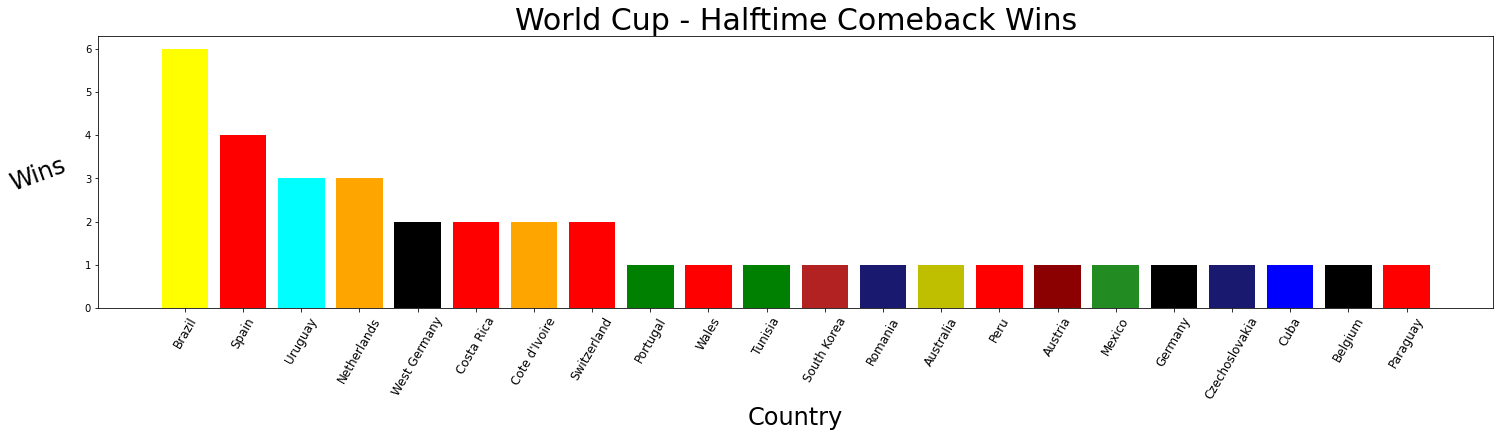

In [174]:
fig,ax = plt.subplots(figsize=(25,5))
ax.bar(comeback_teams.index,comeback_teams, color=comeback_teams_colors)

ax.set_title('World Cup - Halftime Comeback Wins', fontsize=30)
ax.set_xticks(np.arange(0,22,step=1))
ax.set_xticklabels(labels=comeback_teams.index,rotation=60, fontsize=12)
ax.set_xlabel('Country', fontsize=24)
ax.set_yticks(ticks=np.arange(0,7,step=1),fontsize=12)
ax.set_ylabel('Wins', rotation=20, fontsize=24)
ax.yaxis.set_label_coords(-0.04,.45)

plt.savefig(f'{comeback_url}/Comeback_Wins_by_Country')

In [175]:
comebacks_by_year = comeback_wins.groupby('year')['matchID'].count()

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


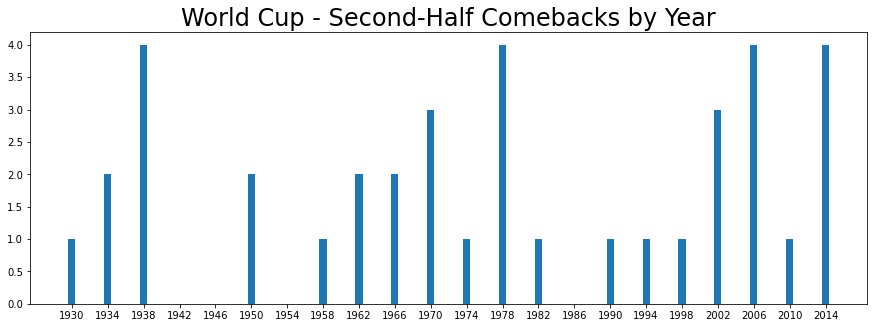

In [176]:
fig, ax = plt.subplots(figsize=(15,5))

ax.bar(comebacks_by_year.index, comebacks_by_year)
# Specify from 1930-2018 so it also shows years with no second-half comebacks
ax.set_xticks(np.arange(1930,2018, step=4))
ax.set_title('World Cup - Second-Half Comebacks by Year', fontsize=24)

plt.savefig(f'{comeback_url}/Comeback_Wins_by_Year')

fig.show()

In [177]:
comebacks_by_host_country = comeback_wins.groupby('country')['matchID'].count()
comebacks_by_host_country = comebacks_by_host_country.sort_values(ascending=False)

In [178]:
comebacks_by_host_country_colors = ['yellow', 'mediumblue', 'k', 
                                     'skyblue', 'limegreen', 'g', 
                                     'firebrick', 'b', 'red', 
                                     'g', 'r', 'y',
                                     'b', 'c']

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


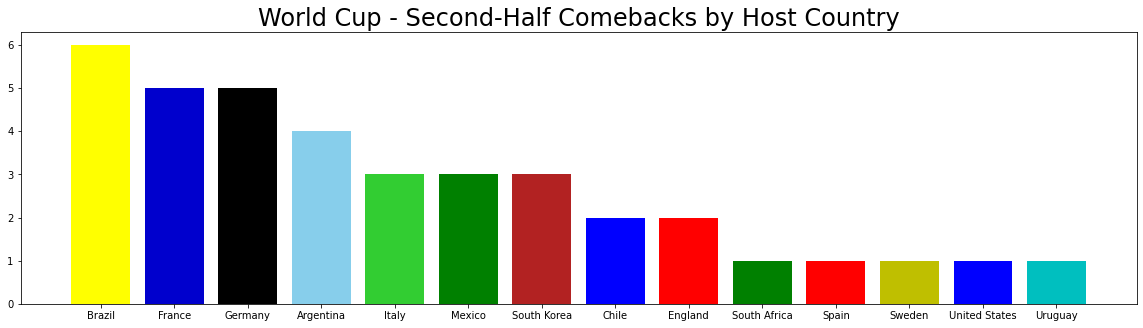

In [179]:
fig, ax = plt.subplots(figsize=(20,5))

ax.bar(comebacks_by_host_country.index, comebacks_by_host_country, color=comebacks_by_host_country_colors)
ax.set_title('World Cup - Second-Half Comebacks by Host Country', fontsize=24)

plt.savefig(f'{comeback_url}/Comeback_Wins_by_Host')

fig.show()

In [180]:
comeback_wins['score_diff_half'] = comeback_wins['losing_score_half1'] - comeback_wins['winning_score_half1']
comeback_wins['score_diff_final'] = comeback_wins['winning_score_final'] - comeback_wins['losing_score_final']
comeback_wins['winning_score_half2'] = comeback_wins['winning_score_final'] - comeback_wins['winning_score_half1']
comeback_wins['losing_score_half2'] = comeback_wins['losing_score_final'] - comeback_wins['losing_score_half1']

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [181]:
losing_score_half2_group = comeback_wins.groupby('losing_score_half2')['matchID'].count()
losing_score_half1_group = comeback_wins.groupby('losing_score_half1')['matchID'].count()

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


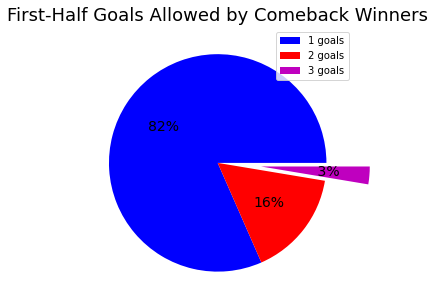

In [182]:
fig,ax = plt.subplots(figsize=(20,5))

labels = losing_score_half1_group.index
labels_adj = []

for i in range(len(labels)):
    labels_adj.append(int(labels[i]))
    labels_adj[i] = f'{labels_adj[i]} goals'
    
ax.set_title('First-Half Goals Allowed by Comeback Winners', fontsize=18)
ax.pie(losing_score_half1_group, autopct='%2.0f%%', 
       colors=['b','r','m'], explode=[0,0,0.4],
      textprops={'fontsize': 14})
ax.legend(labels_adj)

plt.savefig(f'{comeback_url}/Comeback_Goals_Allowed_Half1')

fig.show()

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


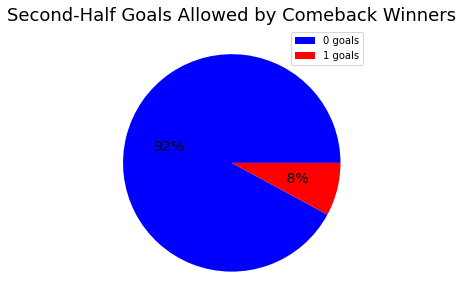

In [183]:
fig,ax = plt.subplots(figsize=(20,5))

labels = losing_score_half2_group.index
labels_adj = []

for i in range(len(labels)):
    labels_adj.append(int(labels[i]))
    labels_adj[i] = f'{labels_adj[i]} goals'
    
ax.set_title('Second-Half Goals Allowed by Comeback Winners', fontsize=18)
ax.pie(losing_score_half2_group, autopct='%2.0f%%', colors=['b','r'],
      textprops={'fontsize': 14})
ax.legend(labels_adj)

plt.savefig(f'{comeback_url}/Comeback_Goals_Allowed_Half2')

fig.show()

In [184]:
comeback_stages = comeback_wins.groupby('stage')['matchID'].count().sort_values(ascending=False)

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


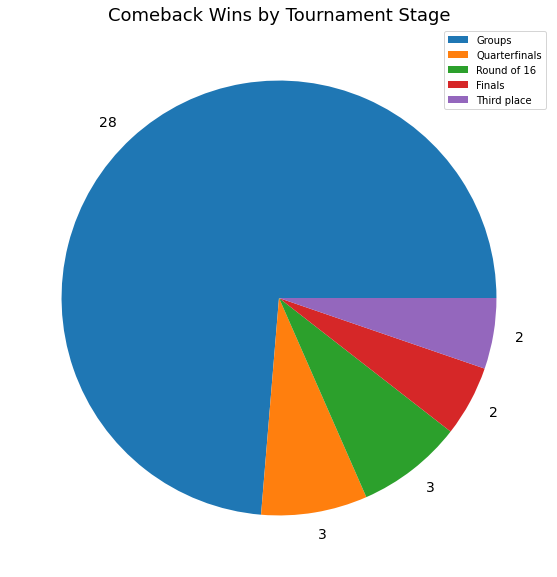

In [185]:
fig,ax = plt.subplots(figsize=(10,10))

labels = comeback_stages.index

    
ax.set_title('Comeback Wins by Tournament Stage', fontsize=18)
ax.pie(comeback_stages, labels=comeback_stages,
      textprops={'fontsize': 14})
ax.legend(labels)

plt.savefig(f'{comeback_url}/Comeback_Wins_by_Stage')

fig.show()